# AI Sales Forecasting Challenge - CH-01
## End-to-End Demand Forecasting Solution

**Author**: Retal Ashraf  
**Date**: February 2026  
**Offline compliance**: Local connecting with Jupyter notebook

---
## Cell 1: Environment Setup & Dependencies

In [140]:
# Install required packages
import sys
import subprocess

# core dependencies
packages = ['pandas','numpy','scikit-learn','xgboost','openpyxl','matplotlib','seaborn', 'arabic-reshaper', 'python-bidi']

for package in packages:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', '-q', package])

print(" All dependencies installed successfully")

 All dependencies installed successfully


---
## Cell 2: Import Libraries & Set Configuration

In [118]:
import pandas as pd
import numpy as np
import warnings
from pathlib import Path
import json
from datetime import datetime
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb

# ML libraries
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
warnings.filterwarnings('ignore')
np.random.seed(42)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Set paths
DATA_DIR = Path('data')
OUTPUT_DIR = Path('output')
OUTPUT_DIR.mkdir(exist_ok=True)

print(" Libraries imported and configuration set")
print(f" Data directory: {DATA_DIR}")
print(f" Output directory: {OUTPUT_DIR}")

 Libraries imported and configuration set
 Data directory: data
 Output directory: output


---
## Cell 3: Data Loading & Initial Validation

In [144]:
import pandas as pd
from pathlib import Path

input_file = Path(r"C:\Input\AI Cosmetics (003).xlsx - Sheet1.csv")

if not input_file.exists():
    raise FileNotFoundError(f"Input file not found: {input_file}")

print(f"Loading data from: {input_file}")

# Load CSV (skip first row if extra header)
df_raw = pd.read_csv(input_file, encoding="utf-8", skiprows=1)

print("\n Data loaded successfully")
print("Shape:", df_raw.shape)
print("Columns:", list(df_raw.columns))

df_raw.head(10)


Loading data from: C:\Input\AI Cosmetics (003).xlsx - Sheet1.csv

 Data loaded successfully
Shape: (456, 26)
Columns: ['BRAND', 'عنوان العميل', 'Sales', 'Qty', 'Sales2', 'Qty3', 'Sales4', 'Qty5', 'Sales6', 'Qty7', 'Sales8', 'Qty9', 'Sales10', 'Qty11', 'Sales12', 'Qty13', 'Sales14', 'Qty15', 'Sales16', 'Qty17', 'Sales18', 'Qty19', 'Sales20', 'Qty21', 'Sales22', 'Qty23']


,BRAND,عنوان العميل,Sales,Qty,Sales2,Qty3,Sales4,Qty5,Sales6,Qty7,Sales8,Qty9,Sales10,Qty11,Sales12,Qty13,Sales14,Qty15,Sales16,Qty17,Sales18,Qty19,Sales20,Qty21,Sales22,Qty23
0,Skin Clinic,المهندسين,0,0.0,0,0.0,0,0.0,0,0.0,271,9.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,Eva Care,مصر الجديدة,0,0.0,0,0.0,0,0.0,153,6.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,45,3.0
2,Glow,المهندسين,0,0.0,139,6.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,Hair Clinic,المهندسين,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,160,6.0,0,0.0,0,0.0,0,0.0
4,Recipe,المهندسين,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,148,6.0,0,0.0,0,0.0
5,Skin Clinic,المهندسين,0,0.0,0,0.0,0,0.0,0,0.0,146,3.0,125,6.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,87,3.0
6,Acetone & Rose water & Joli Eva,المهندسين,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,125,12.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
7,Baby,مصر الجديدة,0,0.0,107,3.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
8,Eva Care,مصر الجديدة,225,4.0,0,0.0,185,4.0,185,4.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
9,Glow,المهندسين,0,12.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,139,6.0,0,0.0,0,0.0,0,0.0,0,0.0


---
## Cell 4: Data Understanding & Exploratory Analysis

In [121]:
print("=" * 80)
print("DATA UNDERSTANDING & QUALITY REPORT")
print("=" * 80)

# Basic info
print(f"\n1. DATASET OVERVIEW")
print(f"   Total rows: {len(df_raw)}")
print(f"   Total columns: {len(df_raw.columns)}")
print(f"   Memory usage: {df_raw.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Data types
print(f"\n2. DATA TYPES")
print(df_raw.dtypes.value_counts())

# Unique values in key columns
print(f"\n3. KEY DIMENSIONS")
print(f"   Unique BRANDs: {df_raw['BRAND'].nunique()}")
print(f"   Unique Locations: {df_raw['عنوان العميل'].nunique()}")
print(f"   Total BRAND × Location combinations: {len(df_raw)}")

print(f"\n4. BRAND DISTRIBUTION")
print(df_raw['BRAND'].value_counts())

print(f"\n5. LOCATION DISTRIBUTION (Top 10)")
print(df_raw['عنوان العميل'].value_counts().head(10))

# Identify sales columns
sales_cols = [col for col in df_raw.columns if 'Sales' in col]
qty_cols = [col for col in df_raw.columns if 'Qty' in col]

print(f"\n6. TIME SERIES COLUMNS")
print(f"   Sales columns: {len(sales_cols)} - {sales_cols[:12]}")
print(f"   Quantity columns: {len(qty_cols)} - {qty_cols[:12]}")

# Check for missing values
print(f"\n7. MISSING VALUES")
missing = df_raw.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("   No missing values detected")

# Sparsity analysis
print(f"\n8. SPARSITY ANALYSIS (ZEROS)")
for col in sales_cols[:3]:
    zero_pct = (df_raw[col] == 0).sum() / len(df_raw) * 100
    print(f"   {col}: {zero_pct:.1f}% zeros")

print("\n" + "=" * 80)

DATA UNDERSTANDING & QUALITY REPORT

1. DATASET OVERVIEW
   Total rows: 456
   Total columns: 26
   Memory usage: 159.59 KB

2. DATA TYPES
int64      12
float64    12
object      2
Name: count, dtype: int64

3. KEY DIMENSIONS
   Unique BRANDs: 16
   Unique Locations: 6
   Total BRAND × Location combinations: 456

4. BRAND DISTRIBUTION
BRAND
Eva Care                           91
Hair Clinic                        88
Skin Clinic                        87
Glow                               77
Acetone & Rose water & Joli Eva    44
Recipe                             32
GPC                                14
Sun & Sea                           6
Baby                                4
Other                               3
B-white                             3
Spotless                            2
One Classic                         2
Man Look Hair Gel                   1
Man Look Expert                     1
Man Look                            1
Name: count, dtype: int64

5. LOCATION DISTRIBUTI

In [122]:
print("=" * 80)
print("DATA UNDERSTANDING & QUALITY REPORT")
print("=" * 80)

# 1) DATASET OVERVIEW
print(f"\n1. DATASET OVERVIEW")
print(f"   Total rows: {len(df_raw)}")
print(f"   Total columns: {len(df_raw.columns)}")
print(f"   Memory usage: {df_raw.memory_usage(deep=True).sum() / 1024:.2f} KB")

# 2) DATA TYPES
print(f"\n2. DATA TYPES")
print(df_raw.dtypes.value_counts())

# 3) KEY DIMENSIONS
print(f"\n3. KEY DIMENSIONS")
print(f"   Unique BRANDs: {df_raw['BRAND'].nunique()}")
print(f"   Unique Locations: {df_raw['عنوان العميل'].nunique()}")
print(f"   Total rows (observations): {len(df_raw)}")

# 4) BRAND DISTRIBUTION
print(f"\n4. BRAND DISTRIBUTION")
print(df_raw['BRAND'].value_counts())

# 5) LOCATION DISTRIBUTION (Top 10)
print(f"\n5. LOCATION DISTRIBUTION (Top 10)")
print(df_raw['عنوان العميل'].value_counts().head(10))

# 6) TIME SERIES COLUMNS
sales_cols = [col for col in df_raw.columns if "Sales" in col]
qty_cols   = [col for col in df_raw.columns if "Qty" in col]

print(f"\n6. TIME SERIES COLUMNS")
print(f"   Sales columns: {len(sales_cols)} - {sales_cols[:5]}{'...' if len(sales_cols) > 5 else ''}")
print(f"   Quantity columns: {len(qty_cols)} - {qty_cols[:5]}{'...' if len(qty_cols) > 5 else ''}")

# 7) MISSING VALUES
print(f"\n7. MISSING VALUES")
missing = df_raw.isnull().sum()
if missing.sum() > 0:
    print(missing[missing > 0])
else:
    print("   No missing values detected")

# 8) SPARSITY ANALYSIS (ZEROS)
print(f"\n8. SPARSITY ANALYSIS (ZEROS)")
for col in sales_cols[:3]:
    zero_pct = (df_raw[col].fillna(0) == 0).sum() / len(df_raw) * 100
    print(f"   {col}: {zero_pct:.1f}% zeros")

# 9) DUPLICATES CHECK + DROP (CORRECT)
print(f"\n9. DUPLICATES CHECK + DROP (CORRECT)")
print("-" * 80)

key_cols = ["BRAND", "عنوان العميل"]

# Full-row duplicates (safe to drop)
full_dupes = df_raw.duplicated().sum()
print(f"   Full-row duplicates: {full_dupes}")

# Key repeats (NOT duplicates in this wide time-series dataset; do NOT drop)
key_repeats = df_raw.duplicated(subset=key_cols).sum()
print(f"   Repeated BRAND × Location rows (expected / do NOT drop): {key_repeats}")

# Drop ONLY full-row duplicates
if full_dupes > 0:
    print("\n Dropping ONLY full-row duplicates ")
    before = len(df_raw)
    df_raw = df_raw.drop_duplicates(keep="first").reset_index(drop=True)
    after = len(df_raw)
    print(f"   Rows before: {before}")
    print(f"   Rows after : {after}")
else:
    print("\n No full-row duplicates — nothing dropped")

# 10) POST-CLEANING VALIDATION
print(f"\n10. POST-CLEANING VALIDATION")
print("-" * 80)

full_dupes_after = df_raw.duplicated().sum()
print(f"   Rows: {len(df_raw)}")
print(f"   Full-row duplicates after cleaning: {full_dupes_after}")

# how many unique pairs exist
unique_pairs = df_raw[key_cols].drop_duplicates().shape[0]
print(f"   Unique BRAND × Location pairs (info only): {unique_pairs}")

print("\n" + "=" * 80)


DATA UNDERSTANDING & QUALITY REPORT

1. DATASET OVERVIEW
   Total rows: 456
   Total columns: 26
   Memory usage: 167.33 KB

2. DATA TYPES
int64      12
float64    12
object      2
Name: count, dtype: int64

3. KEY DIMENSIONS
   Unique BRANDs: 16
   Unique Locations: 6
   Total rows (observations): 456

4. BRAND DISTRIBUTION
BRAND
Eva Care                           91
Hair Clinic                        88
Skin Clinic                        87
Glow                               77
Acetone & Rose water & Joli Eva    44
Recipe                             32
GPC                                14
Sun & Sea                           6
Baby                                4
Other                               3
B-white                             3
Spotless                            2
One Classic                         2
Man Look Hair Gel                   1
Man Look Expert                     1
Man Look                            1
Name: count, dtype: int64

5. LOCATION DISTRIBUTION (Top 10

---
## Cell 5: Data Visualization - Overview & Distribution

 Data overview visualizations 



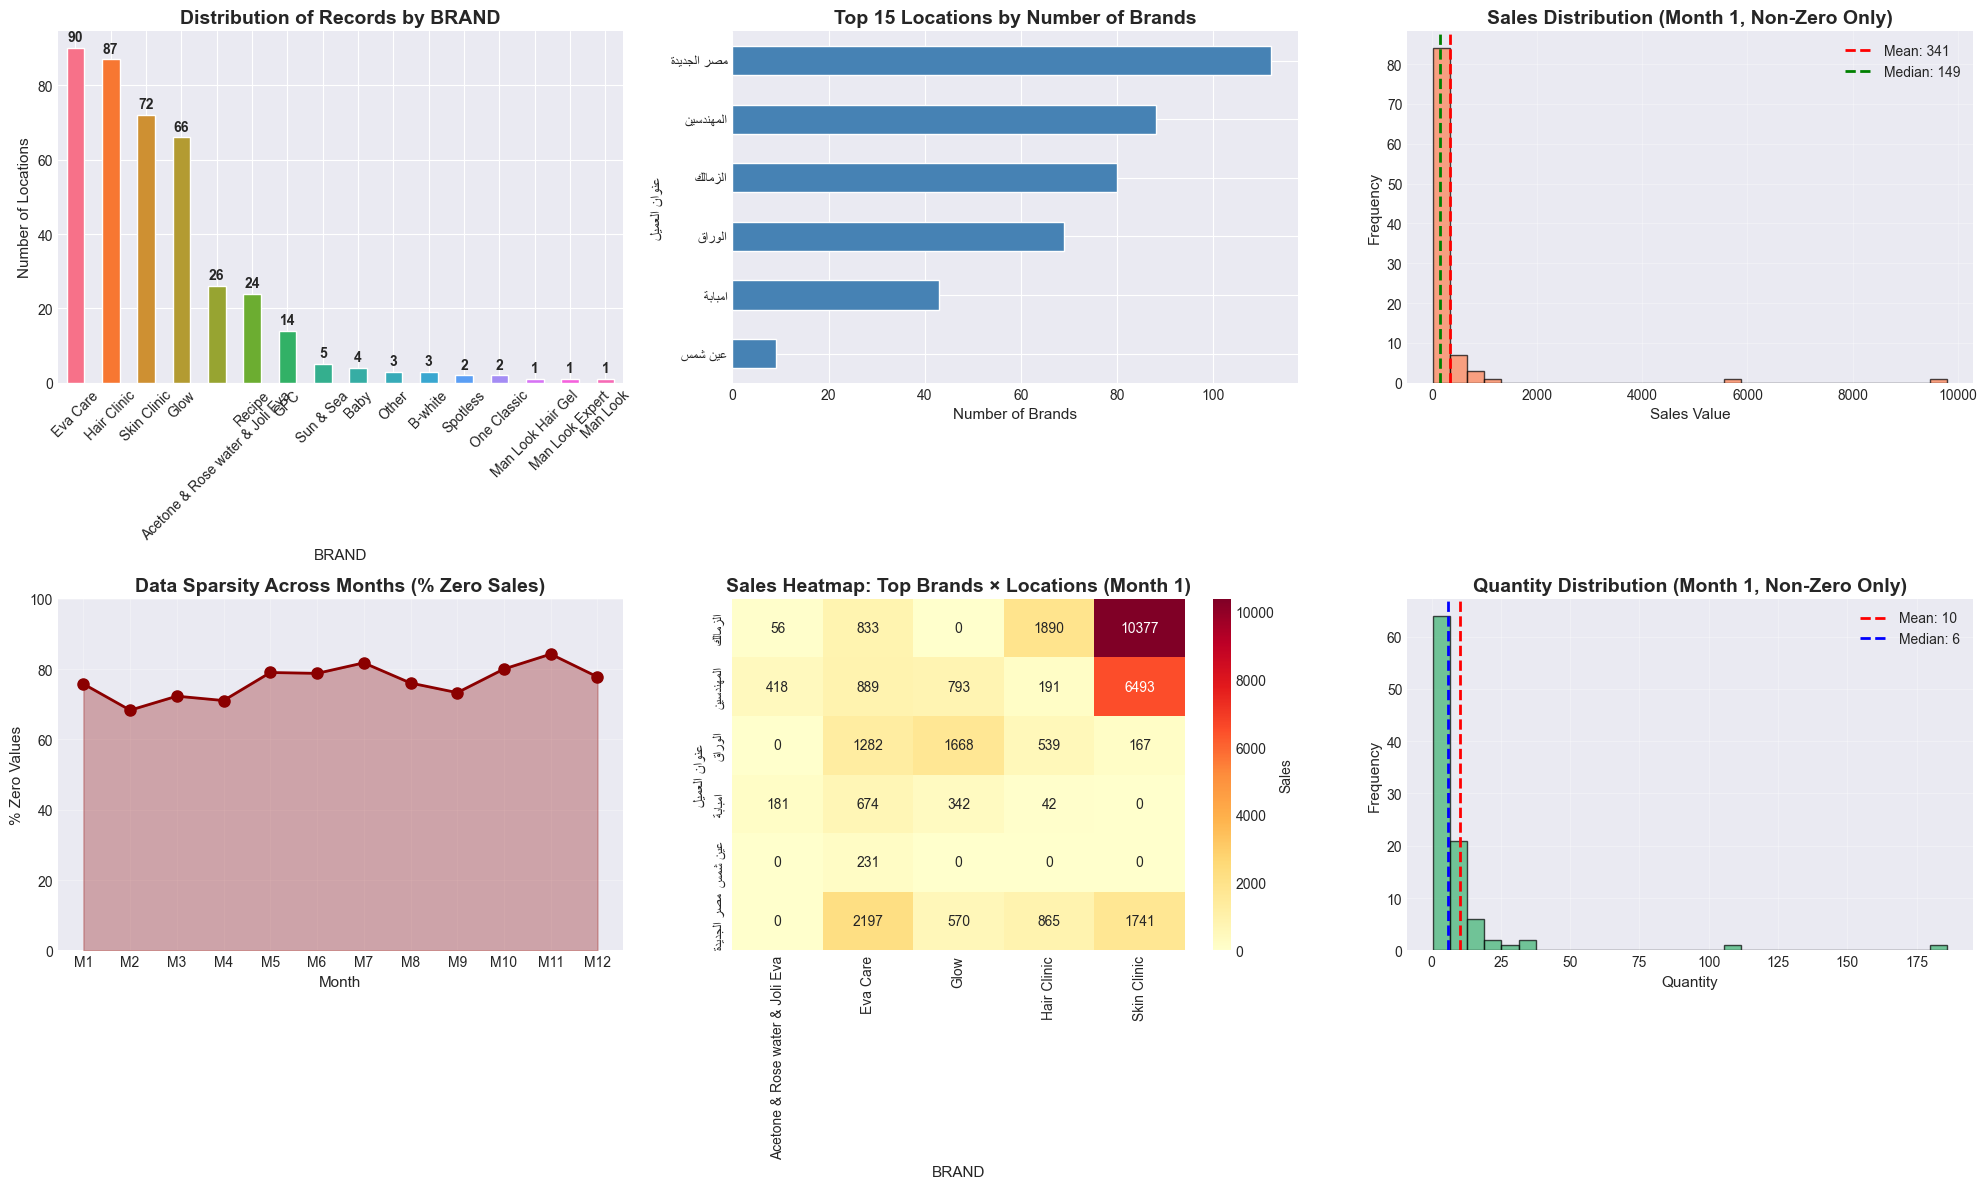


 Data overview visualizations complete
 Saved to: output\data_overview.png


In [123]:
print(" Data overview visualizations \n")

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create figure with subplots
fig = plt.figure(figsize=(20, 12))

# 1. Brand Distribution
ax1 = plt.subplot(2, 3, 1)
brand_counts = df_raw['BRAND'].value_counts()
colors = sns.color_palette('husl', len(brand_counts))
brand_counts.plot(kind='bar', ax=ax1, color=colors)
ax1.set_title('Distribution of Records by BRAND', fontsize=14, fontweight='bold')
ax1.set_xlabel('BRAND', fontsize=11)
ax1.set_ylabel('Number of Locations', fontsize=11)
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(brand_counts):
    ax1.text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

# 2. Top 15 Locations
ax2 = plt.subplot(2, 3, 2)
location_counts = df_raw['عنوان العميل'].value_counts().head(15)

location_labels = [get_display(arabic_reshaper.reshape(loc)) for loc in location_counts.index]

location_counts.plot(kind='barh', ax=ax2, color='steelblue')
ax2.set_yticklabels(location_labels)
ax2.set_title('Top 15 Locations by Number of Brands', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Brands', fontsize=11)
ax2.set_ylabel(get_display(arabic_reshaper.reshape('عنوان العميل')), fontsize=11)

ax2.invert_yaxis()

# 3. Sales Distribution (First Month)
ax3 = plt.subplot(2, 3, 3)
sales_first = df_raw['Sales'].replace(0, np.nan).dropna()
if len(sales_first) > 0:
    ax3.hist(sales_first, bins=30, color='coral', edgecolor='black', alpha=0.7)
    ax3.axvline(sales_first.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {sales_first.mean():.0f}')
    ax3.axvline(sales_first.median(), color='green', linestyle='--', linewidth=2, label=f'Median: {sales_first.median():.0f}')
    ax3.set_title('Sales Distribution (Month 1, Non-Zero Only)', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Sales Value', fontsize=11)
    ax3.set_ylabel('Frequency', fontsize=11)
    ax3.legend()
    ax3.grid(True, alpha=0.3)

# 4. Sparsity Analysis Across Months
ax4 = plt.subplot(2, 3, 4)
sales_cols = [col for col in df_raw.columns if 'Sales' in col]
sparsity_data = []
month_labels = []
for i, col in enumerate(sales_cols, 1):
    zero_pct = (df_raw[col] == 0).sum() / len(df_raw) * 100
    sparsity_data.append(zero_pct)
    month_labels.append(f'M{i}')

ax4.plot(month_labels, sparsity_data, marker='o', linewidth=2, markersize=8, color='darkred')
ax4.fill_between(range(len(month_labels)), sparsity_data, alpha=0.3, color='darkred')
ax4.set_title('Data Sparsity Across Months (% Zero Sales)', fontsize=14, fontweight='bold')
ax4.set_xlabel('Month', fontsize=11)
ax4.set_ylabel('% Zero Values', fontsize=11)
ax4.grid(True, alpha=0.3)
ax4.set_ylim(0, 100)

# 5. BRAND × Location Heatmap
ax5 = plt.subplot(2, 3, 5)
top_brands = df_raw['BRAND'].value_counts().head(5).index
top_locations = df_raw['عنوان العميل'].value_counts().head(10).index
heatmap_data = df_raw[df_raw['BRAND'].isin(top_brands) & df_raw['عنوان العميل'].isin(top_locations)]
pivot_data = heatmap_data.pivot_table(values='Sales', index='عنوان العميل', columns='BRAND', aggfunc='sum', fill_value=0)


pivot_data.index = [get_display(arabic_reshaper.reshape(loc)) for loc in pivot_data.index]

sns.heatmap(pivot_data, annot=True, fmt='.0f', cmap='YlOrRd', ax=ax5, cbar_kws={'label': 'Sales'})
ax5.set_title('Sales Heatmap: Top Brands × Locations (Month 1)', fontsize=14, fontweight='bold')
ax5.set_xlabel('BRAND', fontsize=11)
ax5.set_ylabel('Location', fontsize=11)
ax5.set_ylabel(get_display(arabic_reshaper.reshape('عنوان العميل')), fontsize=11)

# 6. Quantity Distribution (First Month)
ax6 = plt.subplot(2, 3, 6)
qty_first = df_raw['Qty'].replace(0, np.nan).dropna()
if len(qty_first) > 0:
    ax6.hist(qty_first, bins=30, color='mediumseagreen', edgecolor='black', alpha=0.7)
    ax6.axvline(qty_first.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {qty_first.mean():.0f}')
    ax6.axvline(qty_first.median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {qty_first.median():.0f}')
    ax6.set_title('Quantity Distribution (Month 1, Non-Zero Only)', fontsize=14, fontweight='bold')
    ax6.set_xlabel('Quantity', fontsize=11)
    ax6.set_ylabel('Frequency', fontsize=11)
    ax6.legend()
    ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'data_overview.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n Data overview visualizations complete")
print(f" Saved to: {OUTPUT_DIR / 'data_overview.png'}")

---
## Cell 6: Data Transformation (Wide → Long Format)

In [124]:
print("Transforming data from wide to long format\n")

id_cols = ['BRAND', 'عنوان العميل']
sales_cols = [col for col in df_raw.columns if 'Sales' in col]
qty_cols = [col for col in df_raw.columns if 'Qty' in col]

print(f"ID columns: {id_cols}")
print(f"Found {len(sales_cols)} sales columns")
print(f"Found {len(qty_cols)} quantity columns")

# Verify the column pattern
print(f"\nColumn pattern verification:")
print(f"  Sales columns: {sales_cols[:5]}...")
print(f"  Qty columns: {qty_cols[:5]}...")

month_data = []

for idx, row in df_raw.iterrows():
    brand = row['BRAND']
    location = row['عنوان العميل']

    # Month 1: Sales and Qty
    month_data.append({
        'BRAND': brand,
        'عنوان العميل': location,
        'month_id': 1,
        'sales': row['Sales'],
        'qty': row['Qty']
    })

    # Months 2-12: Sales2/Qty3, Sales4/Qty5, Sales6/Qty7, etc.
    month_num = 2
    sales_idx = 2
    qty_idx = 3

    while f'Sales{sales_idx}' in df_raw.columns and f'Qty{qty_idx}' in df_raw.columns:
        month_data.append({
            'BRAND': brand,
            'عنوان العميل': location,
            'month_id': month_num,
            'sales': row[f'Sales{sales_idx}'],
            'qty': row[f'Qty{qty_idx}']
        })
        month_num += 1
        sales_idx += 2
        qty_idx += 2

df_long = pd.DataFrame(month_data)

df_long['sales'] = pd.to_numeric(df_long['sales'], errors='coerce').fillna(0)
df_long['qty'] = pd.to_numeric(df_long['qty'], errors='coerce').fillna(0)

print(f"\n Transformation complete")
print(f"Long format shape: {df_long.shape}")
print(f"Months detected: {df_long['month_id'].min()} to {df_long['month_id'].max()}")
print(f"Total records: {len(df_long)}")
print(f"Expected records (401 rows × 12 months): {401 * 12}")
print(f"\nSample of long format:")
print(df_long.head(15))

# Unique BRAND × Location check
print(f"\n Validation:")
print(f"  Unique BRAND × Location pairs: {df_long.groupby(['BRAND', 'عنوان العميل']).ngroups}")
print(f"  Records per pair : {df_long.groupby(['BRAND', 'عنوان العميل']).size().value_counts()}")

Transforming data from wide to long format

ID columns: ['BRAND', 'عنوان العميل']
Found 12 sales columns
Found 12 quantity columns

Column pattern verification:
  Sales columns: ['Sales', 'Sales2', 'Sales4', 'Sales6', 'Sales8']...
  Qty columns: ['Qty', 'Qty3', 'Qty5', 'Qty7', 'Qty9']...

 Transformation complete
Long format shape: (4812, 5)
Months detected: 1 to 12
Total records: 4812
Expected records (401 rows × 12 months): 4812

Sample of long format:
          BRAND عنوان العميل  month_id  sales  qty
0   Skin Clinic    المهندسين         1      0  0.0
1   Skin Clinic    المهندسين         2      0  0.0
2   Skin Clinic    المهندسين         3      0  0.0
3   Skin Clinic    المهندسين         4      0  0.0
4   Skin Clinic    المهندسين         5    271  9.0
5   Skin Clinic    المهندسين         6      0  0.0
6   Skin Clinic    المهندسين         7      0  0.0
7   Skin Clinic    المهندسين         8      0  0.0
8   Skin Clinic    المهندسين         9      0  0.0
9   Skin Clinic    المهندسين   

In [125]:
print(f"\nSample of long format:")
display(df_long.head(15))


Sample of long format:


,BRAND,عنوان العميل,month_id,sales,qty
0,Skin Clinic,المهندسين,1,0,0.0
1,Skin Clinic,المهندسين,2,0,0.0
2,Skin Clinic,المهندسين,3,0,0.0
3,Skin Clinic,المهندسين,4,0,0.0
4,Skin Clinic,المهندسين,5,271,9.0
5,Skin Clinic,المهندسين,6,0,0.0
6,Skin Clinic,المهندسين,7,0,0.0
7,Skin Clinic,المهندسين,8,0,0.0
8,Skin Clinic,المهندسين,9,0,0.0
9,Skin Clinic,المهندسين,10,0,0.0


---
## Cell 7: Time Series Visualization

Generating time series visualizations...



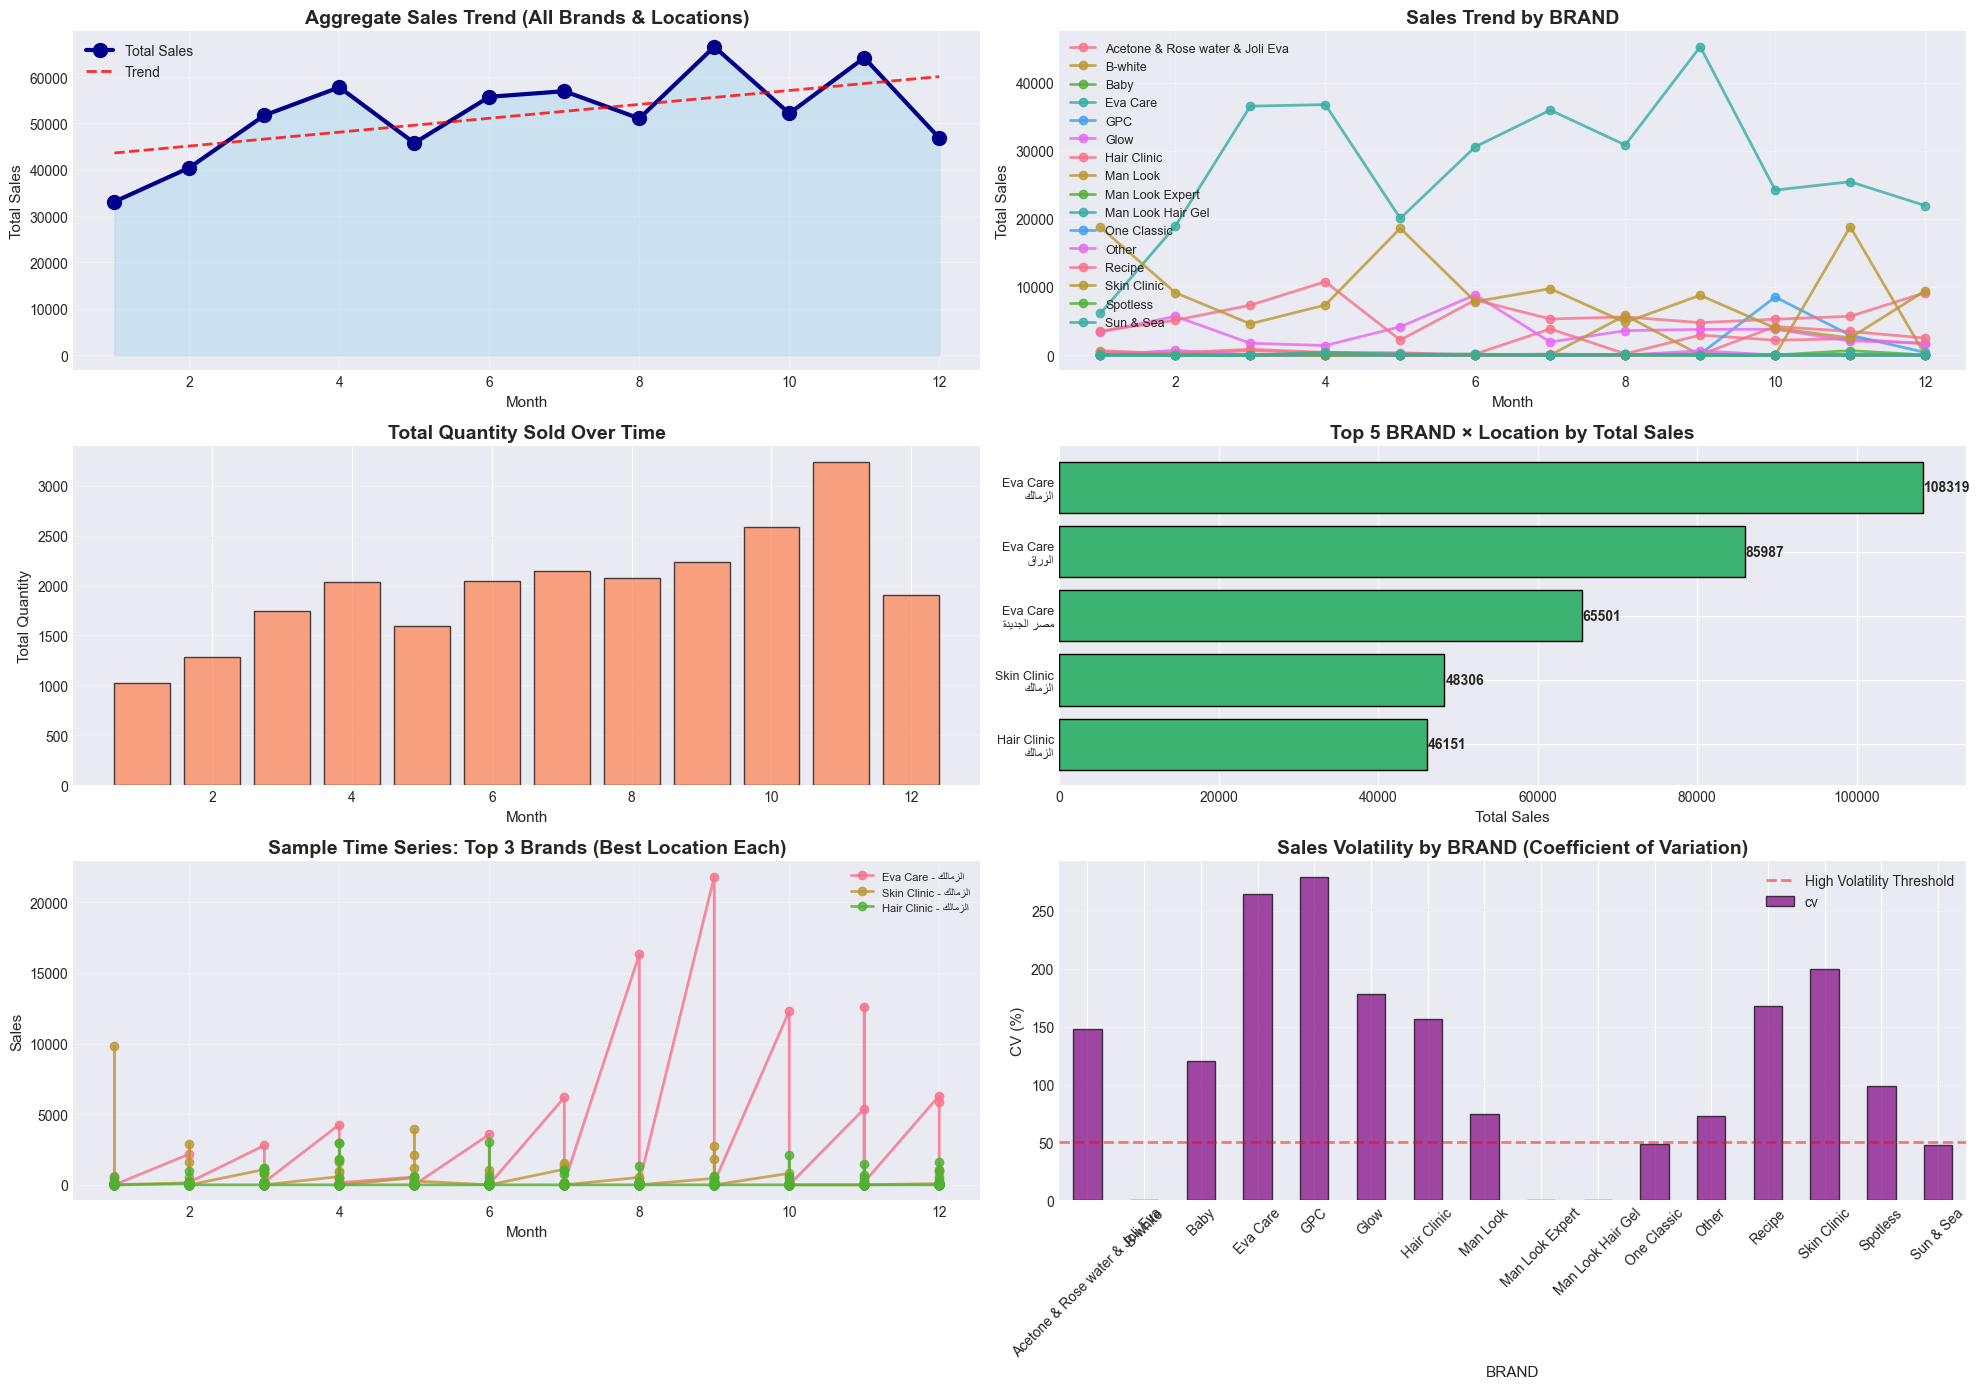


 Time series visualizations complete
 Saved to: output\time_series_analysis.png


In [148]:
print("Generating time series visualizations...\n")

# Create figure
fig = plt.figure(figsize=(20, 14))

# 1. Aggregate Sales Trend Across All Brands
ax1 = plt.subplot(3, 2, 1)
total_sales_by_month = []
month_ids = []
for month_id in sorted(df_long['month_id'].unique()):
    total = df_long[df_long['month_id'] == month_id]['sales'].sum()
    total_sales_by_month.append(total)
    month_ids.append(month_id)

ax1.plot(month_ids, total_sales_by_month, marker='o', linewidth=3, markersize=10, color='darkblue', label='Total Sales')
ax1.fill_between(month_ids, total_sales_by_month, alpha=0.3, color='skyblue')
ax1.set_title('Aggregate Sales Trend (All Brands & Locations)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Month', fontsize=11)
ax1.set_ylabel('Total Sales', fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Add trend line
z = np.polyfit(month_ids, total_sales_by_month, 1)
p = np.poly1d(z)
ax1.plot(month_ids, p(month_ids), "r--", linewidth=2, alpha=0.8, label='Trend')
ax1.legend()

# 2. Sales by BRAND Over Time
ax2 = plt.subplot(3, 2, 2)
for brand in df_long['BRAND'].unique():
    brand_data = df_long[df_long['BRAND'] == brand].groupby('month_id')['sales'].sum()
    ax2.plot(brand_data.index, brand_data.values, marker='o', linewidth=2, label=brand, alpha=0.8)

ax2.set_title('Sales Trend by BRAND', fontsize=14, fontweight='bold')
ax2.set_xlabel('Month', fontsize=11)
ax2.set_ylabel('Total Sales', fontsize=11)
ax2.legend(loc='best', fontsize=9)
ax2.grid(True, alpha=0.3)

# 3. Quantity Trend
ax3 = plt.subplot(3, 2, 3)
total_qty_by_month = df_long.groupby('month_id')['qty'].sum()
ax3.bar(total_qty_by_month.index, total_qty_by_month.values, color='coral', edgecolor='black', alpha=0.7)
ax3.set_title('Total Quantity Sold Over Time', fontsize=14, fontweight='bold')
ax3.set_xlabel('Month', fontsize=11)
ax3.set_ylabel('Total Quantity', fontsize=11)
ax3.grid(True, alpha=0.3, axis='y')

# 4. Top 5 Performing BRAND×Location Combinations
ax4 = plt.subplot(3, 2, 4)
top_combinations = df_long.groupby(['BRAND', 'عنوان العميل'])['sales'].sum().sort_values(ascending=False).head(5)

top_combinations_labels = []
for brand, loc in top_combinations.index:
    loc_display = get_display(arabic_reshaper.reshape(loc))
    if len(loc) > 15:
        label = f"{brand}\n{loc_display[:15]}..."
    else:
        label = f"{brand}\n{loc_display}"
    top_combinations_labels.append(label)

ax4.barh(range(len(top_combinations)), top_combinations.values, color='mediumseagreen', edgecolor='black')
ax4.set_yticks(range(len(top_combinations)))
ax4.set_yticklabels(top_combinations_labels, fontsize=9)
ax4.set_title('Top 5 BRAND × Location by Total Sales', fontsize=14, fontweight='bold')
ax4.set_xlabel('Total Sales', fontsize=11)
ax4.invert_yaxis()
for i, v in enumerate(top_combinations.values):
    ax4.text(v + 100, i, f'{v:.0f}', va='center', fontweight='bold')


# 5. Sample Time Series (Top 3 Brands)
ax5 = plt.subplot(3, 2, 5)
top_3_brands = df_long.groupby('BRAND')['sales'].sum().sort_values(ascending=False).head(3).index
for i, brand in enumerate(top_3_brands):
    sample_location = df_long[df_long['BRAND'] == brand].groupby('عنوان العميل')['sales'].sum().idxmax()
    sample_data = df_long[(df_long['BRAND'] == brand) & (df_long['عنوان العميل'] == sample_location)]

    # Fix Arabic label
    reshaped_loc = arabic_reshaper.reshape(sample_location)
    loc_display = get_display(reshaped_loc)
    if len(loc_display) > 20:
        label = f"{brand} - {loc_display[:20]}..."
    else:
        label = f"{brand} - {loc_display}"

    ax5.plot(sample_data['month_id'], sample_data['sales'], marker='o', linewidth=2,
             label=label, alpha=0.8)

ax5.set_title('Sample Time Series: Top 3 Brands (Best Location Each)', fontsize=14, fontweight='bold')
ax5.set_xlabel('Month', fontsize=11)
ax5.set_ylabel('Sales', fontsize=11)
ax5.legend(loc='best', fontsize=8)
ax5.grid(True, alpha=0.3)

# 6. Coefficient of Variation Analysis
ax6 = plt.subplot(3, 2, 6)
cv_by_brand = df_long[df_long['sales'] > 0].groupby('BRAND')['sales'].agg(['mean', 'std'])
cv_by_brand['cv'] = (cv_by_brand['std'] / cv_by_brand['mean']) * 100
cv_by_brand['cv'].plot(kind='bar', ax=ax6, color='purple', edgecolor='black', alpha=0.7)
ax6.set_title('Sales Volatility by BRAND (Coefficient of Variation)', fontsize=14, fontweight='bold')
ax6.set_xlabel('BRAND', fontsize=11)
ax6.set_ylabel('CV (%)', fontsize=11)
ax6.tick_params(axis='x', rotation=45)
ax6.grid(True, alpha=0.3, axis='y')
ax6.axhline(y=50, color='red', linestyle='--', linewidth=2, alpha=0.5, label='High Volatility Threshold')
ax6.legend()

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'time_series_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n Time series visualizations complete")
print(f" Saved to: {OUTPUT_DIR / 'time_series_analysis.png'}")

---
## Cell 8: Feature Engineering

In [127]:
print("Creating features Engneerig")

# Sort by BRAND, Location, Month
df_long = df_long.sort_values(['BRAND', 'عنوان العميل', 'month_id']).reset_index(drop=True)

# Create lag features (shifted within each BRAND × Location group)
df_long['sales_lag1'] = df_long.groupby(['BRAND', 'عنوان العميل'])['sales'].shift(1)
df_long['sales_lag2'] = df_long.groupby(['BRAND', 'عنوان العميل'])['sales'].shift(2)
df_long['sales_lag3'] = df_long.groupby(['BRAND', 'عنوان العميل'])['sales'].shift(3)

df_long['qty_lag1'] = df_long.groupby(['BRAND', 'عنوان العميل'])['qty'].shift(1)
df_long['qty_lag2'] = df_long.groupby(['BRAND', 'عنوان العميل'])['qty'].shift(2)
df_long['qty_lag3'] = df_long.groupby(['BRAND', 'عنوان العميل'])['qty'].shift(3)

# Rolling statistics (3-month window)
df_long['sales_rolling_mean_3'] = df_long.groupby(['BRAND', 'عنوان العميل'])['sales'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)
df_long['sales_rolling_std_3'] = df_long.groupby(['BRAND', 'عنوان العميل'])['sales'].transform(
    lambda x: x.rolling(window=3, min_periods=1).std()
)

df_long['qty_rolling_mean_3'] = df_long.groupby(['BRAND', 'عنوان العميل'])['qty'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)

# Cumulative features
df_long['sales_cumsum'] = df_long.groupby(['BRAND', 'عنوان العميل'])['sales'].cumsum()
df_long['qty_cumsum'] = df_long.groupby(['BRAND', 'عنوان العميل'])['qty'].cumsum()

# Trend features
df_long['month_since_start'] = df_long.groupby(['BRAND', 'عنوان العميل']).cumcount() + 1

le_brand = LabelEncoder()
le_location = LabelEncoder()

df_long['brand_encoded'] = le_brand.fit_transform(df_long['BRAND'])
df_long['location_encoded'] = le_location.fit_transform(df_long['عنوان العميل'])

df_long = df_long.fillna(0)

print(f" Feature engineering complete")
print(f"Final feature set shape: {df_long.shape}")
print(f"\nFeatures created:")
print(df_long.columns.tolist())
print(f"\nSample with features:")
print(df_long[['BRAND', 'عنوان العميل', 'month_id', 'sales', 'sales_lag1',
               'sales_rolling_mean_3', 'brand_encoded']].head(10))

Creating features Engneerig
 Feature engineering complete
Final feature set shape: (4812, 19)

Features created:
['BRAND', 'عنوان العميل', 'month_id', 'sales', 'qty', 'sales_lag1', 'sales_lag2', 'sales_lag3', 'qty_lag1', 'qty_lag2', 'qty_lag3', 'sales_rolling_mean_3', 'sales_rolling_std_3', 'qty_rolling_mean_3', 'sales_cumsum', 'qty_cumsum', 'month_since_start', 'brand_encoded', 'location_encoded']

Sample with features:
                             BRAND عنوان العميل  month_id  sales  sales_lag1  sales_rolling_mean_3  brand_encoded
0  Acetone & Rose water & Joli Eva      الزمالك         1      0         0.0              0.000000              0
1  Acetone & Rose water & Joli Eva      الزمالك         1      0         0.0              0.000000              0
2  Acetone & Rose water & Joli Eva      الزمالك         1     56         0.0             18.666667              0
3  Acetone & Rose water & Joli Eva      الزمالك         1      0        56.0             18.666667              0
4  Ac

In [150]:
df_long

,BRAND,عنوان العميل,month_id,sales,qty,sales_lag1,sales_lag2,sales_lag3,qty_lag1,qty_lag2,qty_lag3,sales_rolling_mean_3,sales_rolling_std_3,qty_rolling_mean_3,sales_cumsum,qty_cumsum,month_since_start,brand_encoded,location_encoded
0,Acetone & Rose water & Joli Eva,الزمالك,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0,0.0,1,0,0
1,Acetone & Rose water & Joli Eva,الزمالك,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0,0.0,2,0,0
2,Acetone & Rose water & Joli Eva,الزمالك,1,56,3.0,0.0,0.0,0.0,0.0,0.0,0.0,18.666667,32.331615,1.0,56,3.0,3,0,0
3,Acetone & Rose water & Joli Eva,الزمالك,1,0,0.0,56.0,0.0,0.0,3.0,0.0,0.0,18.666667,32.331615,1.0,56,3.0,4,0,0
4,Acetone & Rose water & Joli Eva,الزمالك,2,0,0.0,0.0,56.0,0.0,0.0,3.0,0.0,18.666667,32.331615,1.0,56,3.0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,Sun & Sea,مصر الجديدة,11,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,545,12.0,32,15,5
4808,Sun & Sea,مصر الجديدة,11,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,545,12.0,33,15,5
4809,Sun & Sea,مصر الجديدة,12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,545,12.0,34,15,5
4810,Sun & Sea,مصر الجديدة,12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,545,12.0,35,15,5


---
## Cell 9: Sparse_Sales_Cases Analysis & Handling

In [128]:
print("Analyzing sparse_sales_cases\n")

# sparse_sales_cases cases (combinations with very little history)
Sparse_Sales_Cases_threshold = 3  # Less than 3 non-zero months

nonzero_counts = df_long.groupby(['BRAND', 'عنوان العميل']).apply(
    lambda x: (x['sales'] > 0).sum()
).reset_index(name='nonzero_months')

sparse_sales_cases = nonzero_counts[nonzero_counts['nonzero_months'] < Sparse_Sales_Cases_threshold ]

print(f"Total BRAND × Location combinations: {len(nonzero_counts)}")
print(f"sparse_sales_cases  (< {Sparse_Sales_Cases_threshold } non-zero months): {len(sparse_sales_cases)}")
print(f"sparse_sales_cases percentage: {len(sparse_sales_cases) / len(nonzero_counts) * 100:.1f}%")

# 1. BRAND-level average
brand_avg_sales = df_long[df_long['sales'] > 0].groupby('BRAND')['sales'].mean().to_dict()
brand_avg_qty = df_long[df_long['qty'] > 0].groupby('BRAND')['qty'].mean().to_dict()

# 2. Location-level average
location_avg_sales = df_long[df_long['sales'] > 0].groupby('عنوان العميل')['sales'].mean().to_dict()
location_avg_qty = df_long[df_long['qty'] > 0].groupby('عنوان العميل')['qty'].mean().to_dict()

# 3. Global average
global_avg_sales = df_long[df_long['sales'] > 0]['sales'].mean()
global_avg_qty = df_long[df_long['qty'] > 0]['qty'].mean()

print(f"\nFallback values calculated:")
print(f"   Global avg sales: {global_avg_sales:.2f}")
print(f"   Global avg qty: {global_avg_qty:.2f}")
print(f"   BRAND averages: {len(brand_avg_sales)} brands")
print(f"   Location averages: {len(location_avg_sales)} locations")

# Store for later use
fallback_dict = {
    'brand_avg_sales': brand_avg_sales,
    'brand_avg_qty': brand_avg_qty,
    'location_avg_sales': location_avg_sales,
    'location_avg_qty': location_avg_qty,
    'global_avg_sales': global_avg_sales,
    'global_avg_qty': global_avg_qty
}

print("\n sparse_sales_cases analysis complete")

Analyzing sparse_sales_cases

Total BRAND × Location combinations: 50
sparse_sales_cases  (< 3 non-zero months): 18
sparse_sales_cases percentage: 36.0%

Fallback values calculated:
   Global avg sales: 551.58
   Global avg qty: 21.18
   BRAND averages: 16 brands
   Location averages: 6 locations

 sparse_sales_cases analysis complete


---
## Cell 10: Train/Validation Split

In [129]:
print("Splitting data for training and validation...\n")

# Determine max month
max_month = df_long['month_id'].max()
print(f"Maximum month in dataset: {max_month}")

# Time-based split: use last 2 months for validation
val_months = 2
train_cutoff = max_month - val_months

df_train = df_long[df_long['month_id'] <= train_cutoff].copy()
df_val = df_long[df_long['month_id'] > train_cutoff].copy()

print(f"\nTrain/Validation split:")
print(f"   Training: months 1-{train_cutoff} ({len(df_train)} records)")
print(f"   Validation: months {train_cutoff+1}-{max_month} ({len(df_val)} records)")

# Define feature columns
feature_cols = [
    'month_id',
    'brand_encoded',
    'location_encoded',
    'sales_lag1', 'sales_lag2', 'sales_lag3',
    'qty_lag1', 'qty_lag2', 'qty_lag3',
    'sales_rolling_mean_3', 'sales_rolling_std_3',
    'qty_rolling_mean_3',
    'sales_cumsum', 'qty_cumsum',
    'month_since_start'
]

print(f"\nFeature columns ({len(feature_cols)}):")
print(feature_cols)

print("\n Data split complete")

Splitting data for training and validation...

Maximum month in dataset: 12

Train/Validation split:
   Training: months 1-10 (4010 records)
   Validation: months 11-12 (802 records)

Feature columns (15):
['month_id', 'brand_encoded', 'location_encoded', 'sales_lag1', 'sales_lag2', 'sales_lag3', 'qty_lag1', 'qty_lag2', 'qty_lag3', 'sales_rolling_mean_3', 'sales_rolling_std_3', 'qty_rolling_mean_3', 'sales_cumsum', 'qty_cumsum', 'month_since_start']

 Data split complete


---
## Cell 11: Model Training - Sales Forecasting

Training XGBoost model for SALES forecasting

 Sales model trained

Validation Metrics (Sales):
   MAE:   34.34
   RMSE:  315.31
   MAPE:  998.37%

Official Challenge Metrics:
   WAPE:  24.81%
   sMAPE: 146.44%
   Bias:  -2.70

Top 10 Important Features (Sales):
                 feature  importance
11    qty_rolling_mean_3    0.267793
9   sales_rolling_mean_3    0.165544
4             sales_lag2    0.136876
3             sales_lag1    0.113214
7               qty_lag2    0.108490
6               qty_lag1    0.105677
10   sales_rolling_std_3    0.037249
2       location_encoded    0.019870
5             sales_lag3    0.019133
1          brand_encoded    0.009749


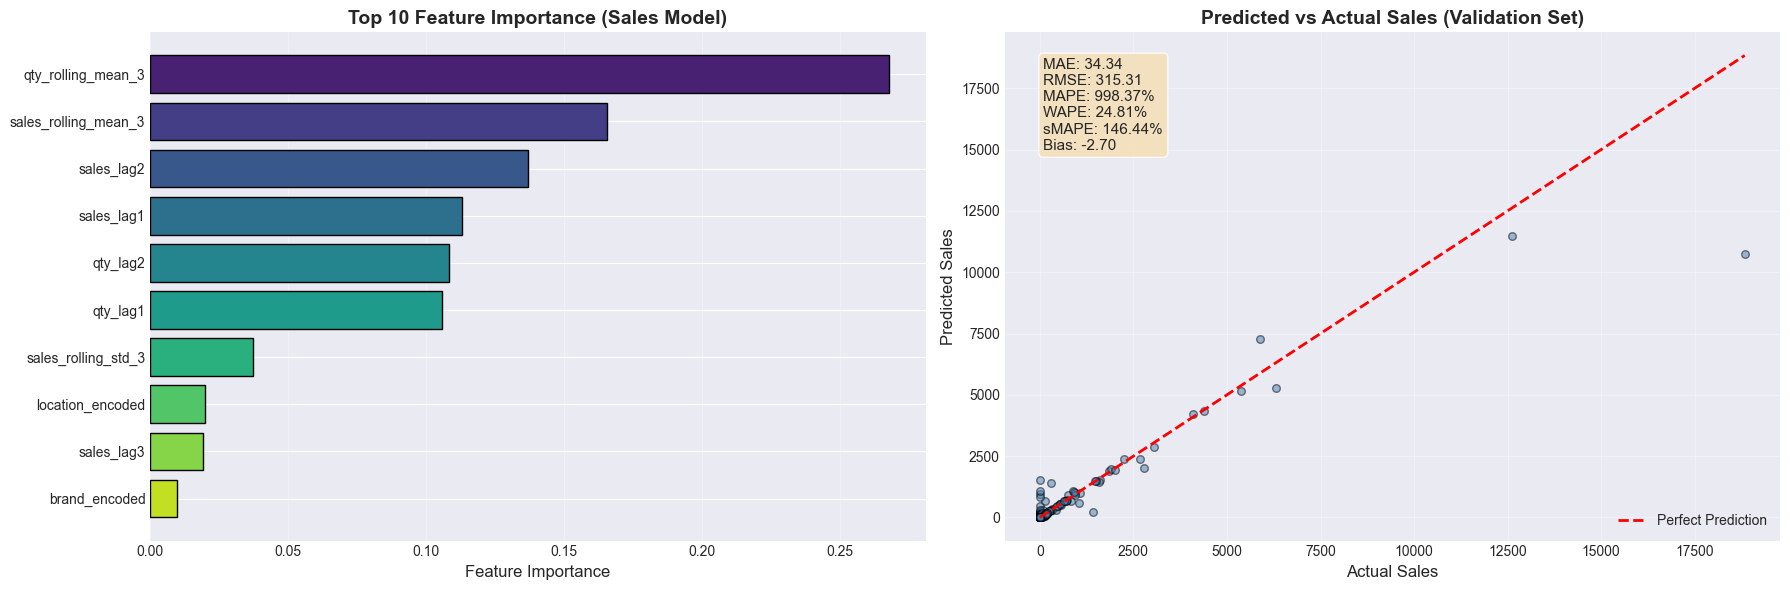

Saved to: output\sales_model_performance.png


In [130]:

print("Training XGBoost model for SALES forecasting\n")

# Prepare training and validation data
X_train = df_train[feature_cols]
y_train_sales = df_train['sales']

X_val = df_val[feature_cols]
y_val_sales = df_val['sales']

# XGBoost parameters
params_sales = {'objective': 'reg:squarederror','max_depth': 6,
'learning_rate': 0.1,'n_estimators': 200,'subsample': 0.8,'colsample_bytree': 0.8,'random_state': 42,'n_jobs': -1}

# Train model
model_sales = xgb.XGBRegressor(**params_sales)
model_sales.fit(X_train, y_train_sales,eval_set=[(X_val, y_val_sales)],verbose=False)

# Predictions on validation set
y_pred_sales = model_sales.predict(X_val)
y_pred_sales = np.maximum(y_pred_sales, 0)  # Enforce non-negative predictions


mae_sales  = mean_absolute_error(y_val_sales, y_pred_sales)
rmse_sales = np.sqrt(mean_squared_error(y_val_sales, y_pred_sales))
mape_sales = np.mean(np.abs((y_val_sales - y_pred_sales) / (y_val_sales + 1))) * 100


wape_sales  = np.sum(np.abs(y_val_sales - y_pred_sales)) / np.sum(y_val_sales) * 100
smape_sales = 100/len(y_val_sales) * np.sum(
    2 * np.abs(y_pred_sales - y_val_sales) / (np.abs(y_val_sales) + np.abs(y_pred_sales) + 1e-6)
)
bias_sales  = np.mean(y_pred_sales - y_val_sales)

print(f" Sales model trained\n")
print(f"Validation Metrics (Sales):")
print(f"   MAE:   {mae_sales:.2f}")
print(f"   RMSE:  {rmse_sales:.2f}")
print(f"   MAPE:  {mape_sales:.2f}%")
print(f"\nOfficial Challenge Metrics:")
print(f"   WAPE:  {wape_sales:.2f}%")
print(f"   sMAPE: {smape_sales:.2f}%")
print(f"   Bias:  {bias_sales:.2f}\n")

# Feature importance
importance_sales = pd.DataFrame({
    'feature': feature_cols,
    'importance': model_sales.feature_importances_
}).sort_values('importance', ascending=False)

print(f"Top 10 Important Features (Sales):")
print(importance_sales.head(10))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

ax1 = axes[0]
top_features = importance_sales.head(10)
colors_fi = sns.color_palette('viridis', len(top_features))
ax1.barh(range(len(top_features)), top_features['importance'].values, color=colors_fi, edgecolor='black')
ax1.set_yticks(range(len(top_features)))
ax1.set_yticklabels(top_features['feature'].values)
ax1.set_xlabel('Feature Importance', fontsize=12)
ax1.set_title('Top 10 Feature Importance (Sales Model)', fontsize=14, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(True, alpha=0.3, axis='x')

# 2. Predicted vs Actual
ax2 = axes[1]
sample_size = min(1000, len(y_val_sales))
sample_idx = np.random.choice(len(y_val_sales), sample_size, replace=False)
ax2.scatter(y_val_sales.iloc[sample_idx], y_pred_sales[sample_idx], alpha=0.5, color='steelblue', edgecolor='black', s=30)
max_val = max(y_val_sales.max(), y_pred_sales.max())
ax2.plot([0, max_val], [0, max_val], 'r--', linewidth=2, label='Perfect Prediction')
ax2.set_xlabel('Actual Sales', fontsize=12)
ax2.set_ylabel('Predicted Sales', fontsize=12)
ax2.set_title('Predicted vs Actual Sales (Validation Set)', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Metrics overlay
metrics_text_sales = (
    f"MAE: {mae_sales:.2f}\n"
    f"RMSE: {rmse_sales:.2f}\n"
    f"MAPE: {mape_sales:.2f}%\n"
    f"WAPE: {wape_sales:.2f}%\n"
    f"sMAPE: {smape_sales:.2f}%\n"
    f"Bias: {bias_sales:.2f}"
)
ax2.text(0.05, 0.95, metrics_text_sales, transform=ax2.transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'sales_model_performance.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Saved to: {OUTPUT_DIR / 'sales_model_performance.png'}")


---
## Cell 12: Model Training - Quantity Forecasting

Training XGBoost model for QUANTITY forecasting...

✓ Quantity model trained

Validation Metrics (Quantity):
   MAE:   1.48
   RMSE:  19.69
   MAPE:  43.55%

Official Challenge Metrics:
   WAPE:  23.15%
   sMAPE: 153.77%
   Bias:  -0.48

Top 10 Important Features (Quantity):
                 feature  importance
11    qty_rolling_mean_3    0.301123
4             sales_lag2    0.190164
3             sales_lag1    0.135163
6               qty_lag1    0.129696
7               qty_lag2    0.086465
9   sales_rolling_mean_3    0.053859
12          sales_cumsum    0.029388
0               month_id    0.020124
14     month_since_start    0.013848
2       location_encoded    0.011848


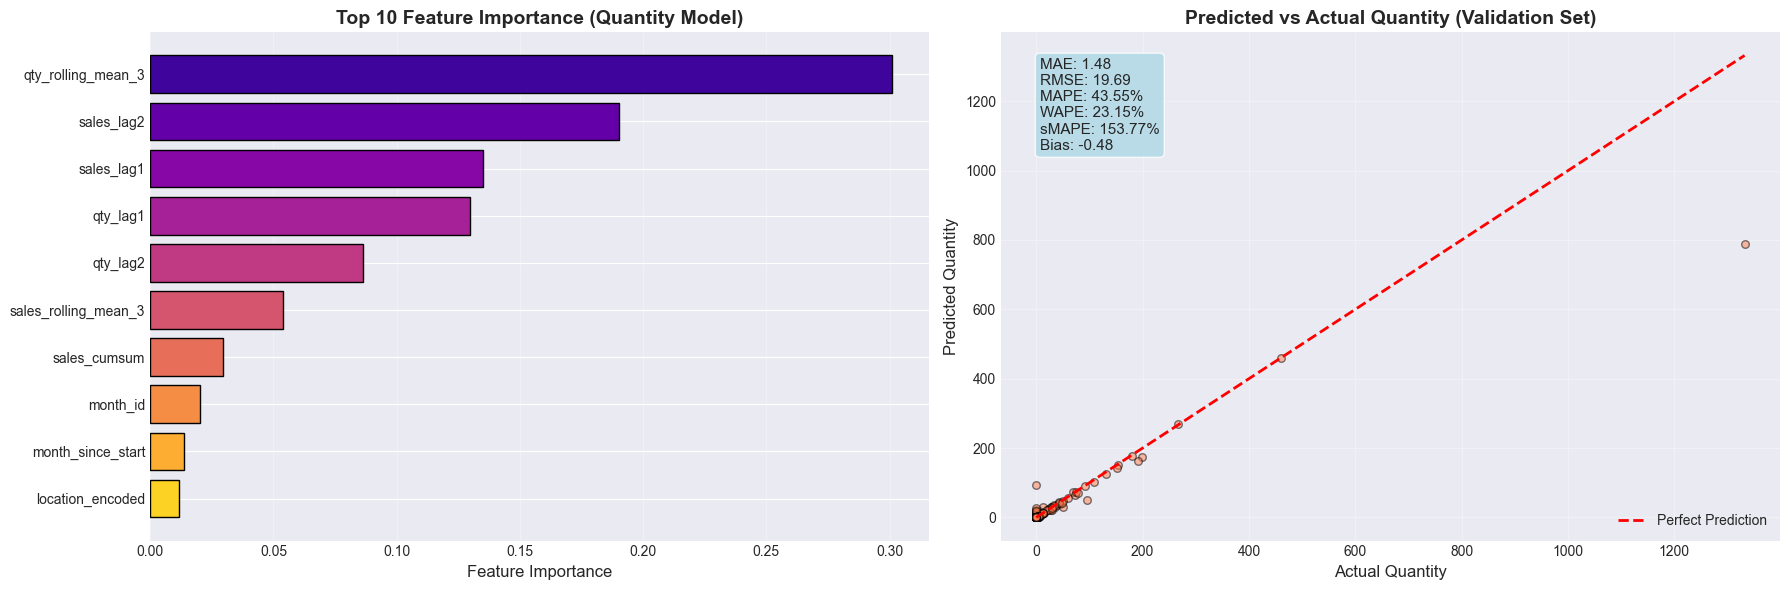

 Saved to: output\quantity_model_performance.png


In [131]:

print("Training XGBoost model for QUANTITY forecasting\n")

y_train_qty = df_train['qty']
y_val_qty   = df_val['qty']

# XGBoost parameters
params_qty = {'objective': 'reg:squarederror','max_depth': 6,
'learning_rate': 0.1,'n_estimators': 200,'subsample': 0.8,'colsample_bytree': 0.8,'random_state': 42,'n_jobs': -1}

# Train model
model_qty = xgb.XGBRegressor(**params_qty)
model_qty.fit(X_train, y_train_qty,eval_set=[(X_val, y_val_qty)],verbose=False)

# Predictions on validation set
y_pred_qty = model_qty.predict(X_val)
y_pred_qty = np.maximum(y_pred_qty, 0)  # Enforce non-negative predictions


mae_qty  = mean_absolute_error(y_val_qty, y_pred_qty)
rmse_qty = np.sqrt(mean_squared_error(y_val_qty, y_pred_qty))
mape_qty = np.mean(np.abs((y_val_qty - y_pred_qty) / (y_val_qty + 1))) * 100


# Weighted Absolute Percentage Error (WAPE)
wape_qty = np.sum(np.abs(y_val_qty - y_pred_qty)) / np.sum(y_val_qty) * 100

# Symmetric Mean Absolute Percentage Error (sMAPE)
smape_qty = 100/len(y_val_qty) * np.sum(
    2 * np.abs(y_pred_qty - y_val_qty) / (np.abs(y_val_qty) + np.abs(y_pred_qty) + 1e-6)
)

# Bias (mean error)
bias_qty = np.mean(y_pred_qty - y_val_qty)

print(f"✓ Quantity model trained\n")
print(f"Validation Metrics (Quantity):")
print(f"   MAE:   {mae_qty:.2f}")
print(f"   RMSE:  {rmse_qty:.2f}")
print(f"   MAPE:  {mape_qty:.2f}%")
print(f"\nOfficial Challenge Metrics:")
print(f"   WAPE:  {wape_qty:.2f}%")
print(f"   sMAPE: {smape_qty:.2f}%")
print(f"   Bias:  {bias_qty:.2f}\n")


importance_qty = pd.DataFrame({
    'feature': feature_cols,
    'importance': model_qty.feature_importances_
}).sort_values('importance', ascending=False)

print(f"Top 10 Important Features (Quantity):")
print(importance_qty.head(10))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 1. Feature Importance
ax1 = axes[0]
top_features_qty = importance_qty.head(10)
colors_qty = sns.color_palette('plasma', len(top_features_qty))
ax1.barh(range(len(top_features_qty)), top_features_qty['importance'].values, color=colors_qty, edgecolor='black')
ax1.set_yticks(range(len(top_features_qty)))
ax1.set_yticklabels(top_features_qty['feature'].values)
ax1.set_xlabel('Feature Importance', fontsize=12)
ax1.set_title('Top 10 Feature Importance (Quantity Model)', fontsize=14, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(True, alpha=0.3, axis='x')

# 2. Predicted vs Actual
ax2 = axes[1]
sample_size = min(1000, len(y_val_qty))
sample_idx = np.random.choice(len(y_val_qty), sample_size, replace=False)
ax2.scatter(y_val_qty.iloc[sample_idx], y_pred_qty[sample_idx], alpha=0.5, color='coral', edgecolor='black', s=30)
max_val_qty = max(y_val_qty.max(), y_pred_qty.max())
ax2.plot([0, max_val_qty], [0, max_val_qty], 'r--', linewidth=2, label='Perfect Prediction')
ax2.set_xlabel('Actual Quantity', fontsize=12)
ax2.set_ylabel('Predicted Quantity', fontsize=12)
ax2.set_title('Predicted vs Actual Quantity (Validation Set)', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

metrics_text_qty = (
    f"MAE: {mae_qty:.2f}\n"
    f"RMSE: {rmse_qty:.2f}\n"
    f"MAPE: {mape_qty:.2f}%\n"
    f"WAPE: {wape_qty:.2f}%\n"
    f"sMAPE: {smape_qty:.2f}%\n"
    f"Bias: {bias_qty:.2f}"
)
ax2.text(0.05, 0.95, metrics_text_qty, transform=ax2.transAxes, fontsize=11,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'quantity_model_performance.png', dpi=150, bbox_inches='tight')
plt.show()

print(f" Saved to: {OUTPUT_DIR / 'quantity_model_performance.png'}")


---
## Cell 13: Residual Analysis & Model Diagnostics

Performing residual analysis and model diagnostics...



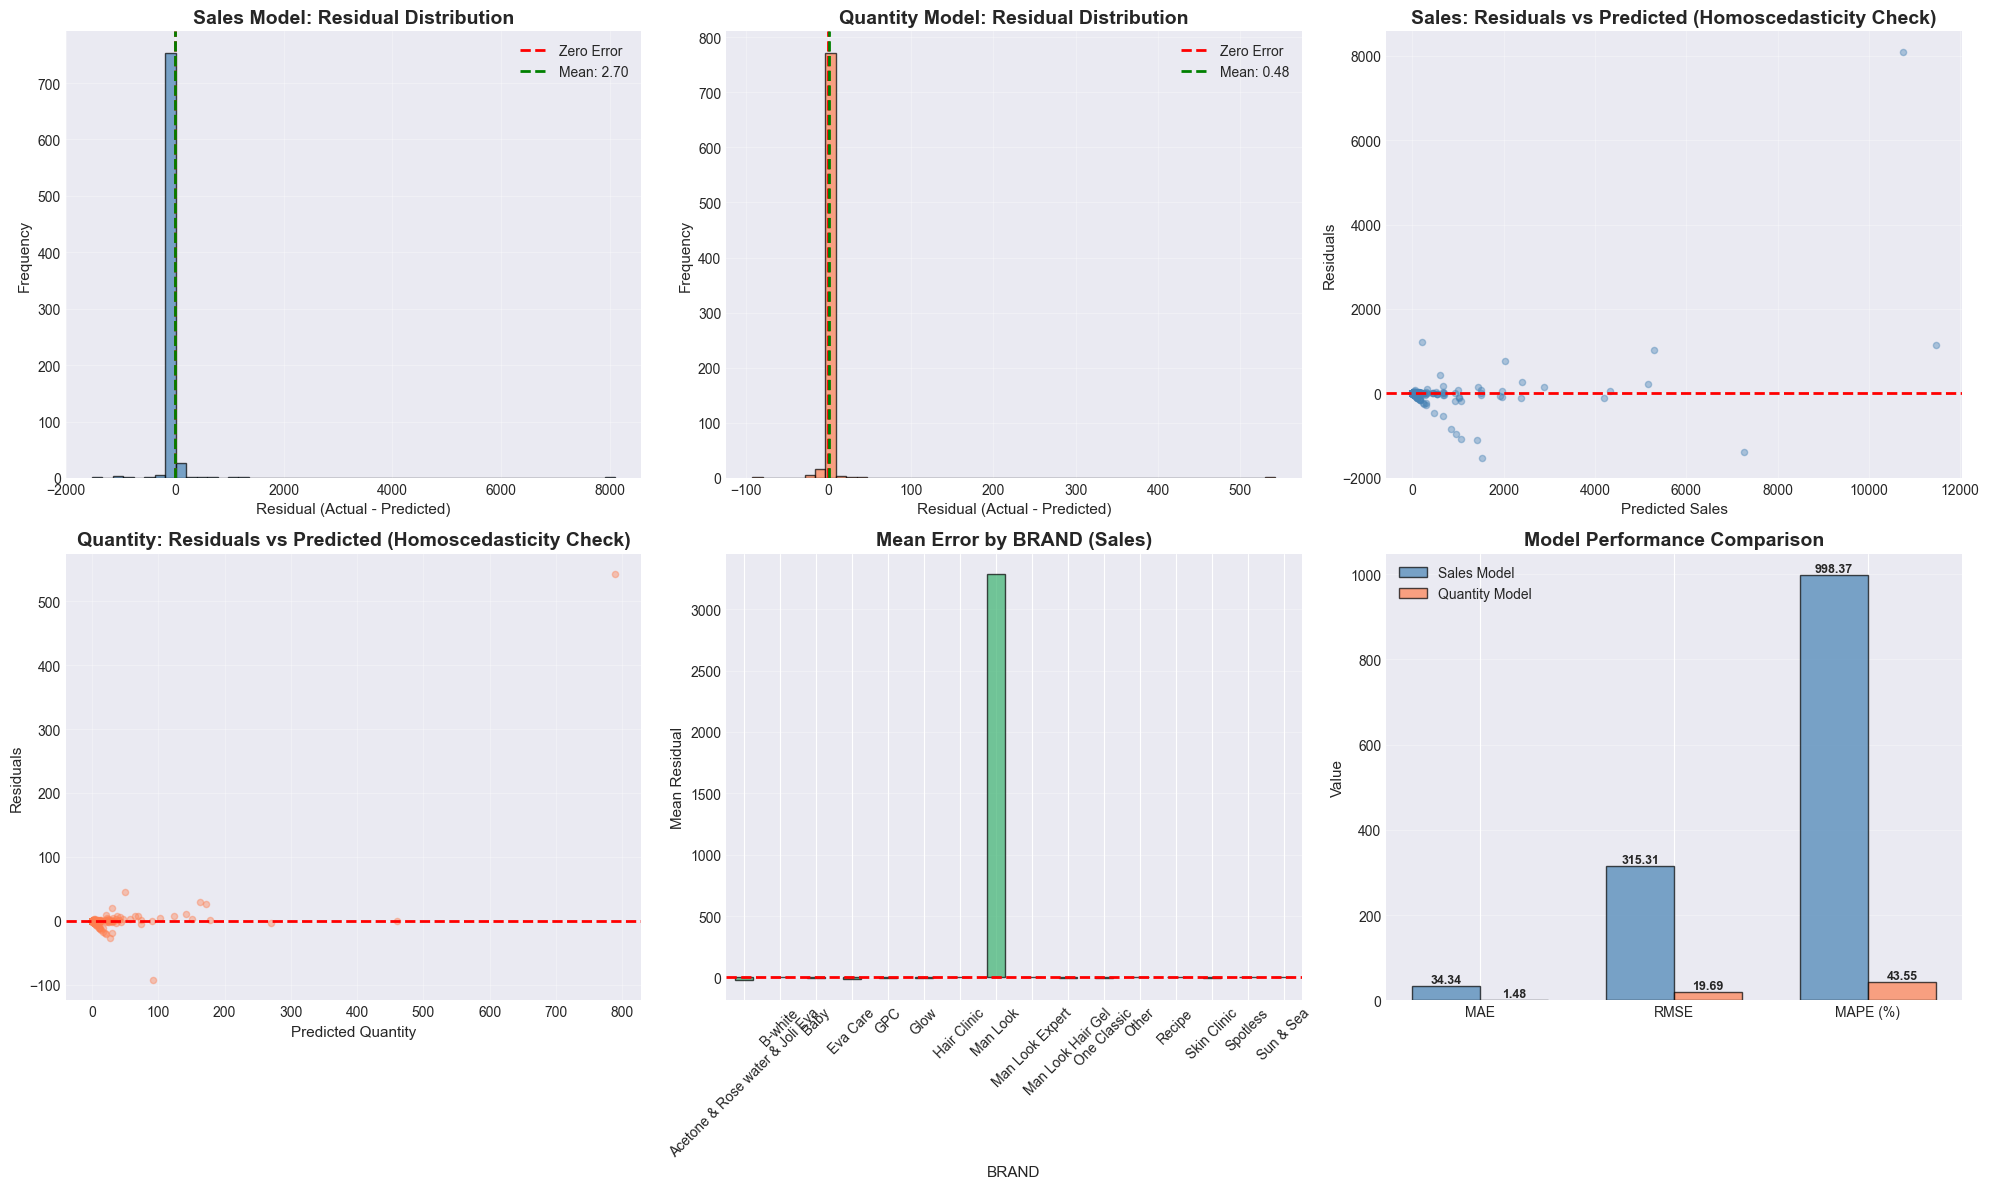


 Residual analysis complete
 Saved to: output\model_diagnostics.png

DIAGNOSTIC SUMMARY

Sales Model:
  Mean Residual: 2.6990 (should be ~0)
  Std Residual: 315.49
  Min Residual: -1523.52
  Max Residual: 8096.58

Quantity Model:
  Mean Residual: 0.4842 (should be ~0)
  Std Residual: 19.70
  Min Residual: -92.45
  Max Residual: 542.48


In [132]:

OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

print("Performing residual analysis and model diagnostics...\n")

# Calculate residuals
residuals_sales = y_val_sales - y_pred_sales
residuals_qty   = y_val_qty - y_pred_qty

fig = plt.figure(figsize=(20, 12))

# 1. Sales Residuals Distribution
ax1 = plt.subplot(2, 3, 1)
ax1.hist(residuals_sales, bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax1.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax1.axvline(residuals_sales.mean(), color='green', linestyle='--', linewidth=2,
            label=f'Mean: {residuals_sales.mean():.2f}')
ax1.set_xlabel('Residual (Actual - Predicted)', fontsize=11)
ax1.set_ylabel('Frequency', fontsize=11)
ax1.set_title('Sales Model: Residual Distribution', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Quantity Residuals Distribution
ax2 = plt.subplot(2, 3, 2)
ax2.hist(residuals_qty, bins=50, color='coral', edgecolor='black', alpha=0.7)
ax2.axvline(0, color='red', linestyle='--', linewidth=2, label='Zero Error')
ax2.axvline(residuals_qty.mean(), color='green', linestyle='--', linewidth=2,
            label=f'Mean: {residuals_qty.mean():.2f}')
ax2.set_xlabel('Residual (Actual - Predicted)', fontsize=11)
ax2.set_ylabel('Frequency', fontsize=11)
ax2.set_title('Quantity Model: Residual Distribution', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Sales Residuals vs Predicted
ax3 = plt.subplot(2, 3, 3)
ax3.scatter(y_pred_sales, residuals_sales, alpha=0.4, color='steelblue', s=20)
ax3.axhline(0, color='red', linestyle='--', linewidth=2)
ax3.set_xlabel('Predicted Sales', fontsize=11)
ax3.set_ylabel('Residuals', fontsize=11)
ax3.set_title('Sales: Residuals vs Predicted (Homoscedasticity Check)', fontsize=14, fontweight='bold')
ax3.grid(True, alpha=0.3)

# 4. Quantity Residuals vs Predicted
ax4 = plt.subplot(2, 3, 4)
ax4.scatter(y_pred_qty, residuals_qty, alpha=0.4, color='coral', s=20)
ax4.axhline(0, color='red', linestyle='--', linewidth=2)
ax4.set_xlabel('Predicted Quantity', fontsize=11)
ax4.set_ylabel('Residuals', fontsize=11)
ax4.set_title('Quantity: Residuals vs Predicted (Homoscedasticity Check)', fontsize=14, fontweight='bold')
ax4.grid(True, alpha=0.3)

# 5. Error by BRAND (Sales)
ax5 = plt.subplot(2, 3, 5)
df_val_copy = df_val.copy()
df_val_copy['residual_sales'] = residuals_sales.values
brand_errors = df_val_copy.groupby('BRAND')['residual_sales'].mean()
brand_errors.plot(kind='bar', ax=ax5, color='mediumseagreen', edgecolor='black', alpha=0.7)
ax5.axhline(0, color='red', linestyle='--', linewidth=2)
ax5.set_xlabel('BRAND', fontsize=11)
ax5.set_ylabel('Mean Residual', fontsize=11)
ax5.set_title('Mean Error by BRAND (Sales)', fontsize=14, fontweight='bold')
ax5.tick_params(axis='x', rotation=45)
ax5.grid(True, alpha=0.3, axis='y')

# 6. Model Comparison Metrics
ax6 = plt.subplot(2, 3, 6)
metrics_comparison = pd.DataFrame({
    'Sales Model': [mae_sales, rmse_sales, mape_sales],
    'Quantity Model': [mae_qty, rmse_qty, mape_qty]
}, index=['MAE', 'RMSE', 'MAPE (%)'])

x_pos = np.arange(len(metrics_comparison))
width = 0.35
ax6.bar(x_pos - width/2, metrics_comparison['Sales Model'], width, label='Sales Model',
        color='steelblue', edgecolor='black', alpha=0.7)
ax6.bar(x_pos + width/2, metrics_comparison['Quantity Model'], width, label='Quantity Model',
        color='coral', edgecolor='black', alpha=0.7)
ax6.set_xticks(x_pos)
ax6.set_xticklabels(metrics_comparison.index)
ax6.set_ylabel('Value', fontsize=11)
ax6.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')
ax6.legend()
ax6.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, metric in enumerate(metrics_comparison.index):
    ax6.text(i - width/2, metrics_comparison.loc[metric, 'Sales Model'] + 0.01,
             f'{metrics_comparison.loc[metric, "Sales Model"]:.2f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')
    ax6.text(i + width/2, metrics_comparison.loc[metric, 'Quantity Model'] + 0.01,
             f'{metrics_comparison.loc[metric, "Quantity Model"]:.2f}',
             ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'model_diagnostics.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n Residual analysis complete")
print(f" Saved to: {OUTPUT_DIR / 'model_diagnostics.png'}")

# Diagnostic summary
print("\n" + "="*60)
print("DIAGNOSTIC SUMMARY")
print("="*60)
print(f"\nSales Model:")
print(f"  Mean Residual: {residuals_sales.mean():.4f} (should be ~0)")
print(f"  Std Residual: {residuals_sales.std():.2f}")
print(f"  Min Residual: {residuals_sales.min():.2f}")
print(f"  Max Residual: {residuals_sales.max():.2f}")

print(f"\nQuantity Model:")
print(f"  Mean Residual: {residuals_qty.mean():.4f} (should be ~0)")
print(f"  Std Residual: {residuals_qty.std():.2f}")
print(f"  Min Residual: {residuals_qty.min():.2f}")
print(f"  Max Residual: {residuals_qty.max():.2f}")
print("="*60)


---
## Cell 14: Retrain on Full Dataset

In [133]:
print("Retraining models on full historical data...\n")

# Prepare full training data
X_full = df_long[feature_cols]
y_full_sales = df_long['sales']
y_full_qty = df_long['qty']

# Retrain sales model
model_sales_final = xgb.XGBRegressor(**params_sales)
model_sales_final.fit(X_full, y_full_sales, verbose=False)

# Retrain quantity model
model_qty_final = xgb.XGBRegressor(**params_qty)
model_qty_final.fit(X_full, y_full_qty, verbose=False)

print(" Models retrained on full dataset")
print(f"   Total training samples: {len(X_full)}")
print(f"   Ready for future forecasting")

Retraining models on full historical data...

 Models retrained on full dataset
   Total training samples: 4812
   Ready for future forecasting


---
## Cell 15: Generate Future Forecasts

In [134]:
print("Generating future forecasts\n")

forecast_months = [max_month + 1, max_month + 2, max_month + 3]

print(f"Current historical period: months 1-{max_month}")
print(f"Forecasting for: {forecast_months}\n")

# Get all unique BRAND × Location combinations
unique_combinations = df_raw[['BRAND', 'عنوان العميل']].drop_duplicates().reset_index(drop=True)

print(f"Total combinations to forecast: {len(unique_combinations)}")

# Prepare forecast dataframe
forecast_results = []

for target_month in forecast_months:
    print(f"\nForecasting month {target_month}...")

    for idx, row in unique_combinations.iterrows():
        brand = row['BRAND']
        location = row['عنوان العميل']

        # Get historical data for this combination
        hist_data = df_long[
            (df_long['BRAND'] == brand) &
            (df_long['عنوان العميل'] == location)
        ].copy()

        # Check if we have enough history
        if len(hist_data) == 0 or hist_data['sales'].sum() == 0:
            # Sparse_Sales_Cases start: use fallback
            pred_sales = brand_avg_sales.get(brand, global_avg_sales)
            pred_qty = brand_avg_qty.get(brand, global_avg_qty)
        else:
            # Get last observation
            last_obs = hist_data[hist_data['month_id'] == hist_data['month_id'].max()].iloc[0]

            # Create features for forecast
            forecast_features = {
                'month_id': target_month,
                'brand_encoded': last_obs['brand_encoded'],
                'location_encoded': last_obs['location_encoded'],
                'sales_lag1': last_obs['sales'],
                'sales_lag2': last_obs['sales_lag1'],
                'sales_lag3': last_obs['sales_lag2'],
                'qty_lag1': last_obs['qty'],
                'qty_lag2': last_obs['qty_lag1'],
                'qty_lag3': last_obs['qty_lag2'],
                'sales_rolling_mean_3': last_obs['sales_rolling_mean_3'],
                'sales_rolling_std_3': last_obs['sales_rolling_std_3'],
                'qty_rolling_mean_3': last_obs['qty_rolling_mean_3'],
                'sales_cumsum': last_obs['sales_cumsum'] + last_obs['sales'],
                'qty_cumsum': last_obs['qty_cumsum'] + last_obs['qty'],
                'month_since_start': last_obs['month_since_start'] + (target_month - last_obs['month_id'])
            }

            # Create feature vector
            X_forecast = pd.DataFrame([forecast_features])[feature_cols]

            # Predict
            pred_sales = model_sales_final.predict(X_forecast)[0]
            pred_qty = model_qty_final.predict(X_forecast)[0]

            # Apply non-negative constraint
            pred_sales = max(0, pred_sales)
            pred_qty = max(0, pred_qty)

        # Store result
        forecast_results.append({
            'BRAND': brand,
            'عنوان العميل': location,
            'target_month': target_month,
            'forecast_sales': pred_sales,
            'forecast_qty': pred_qty
        })

    print(f"   Completed {len(unique_combinations)} forecasts")

# Create forecast dataframe
df_forecast = pd.DataFrame(forecast_results)

print(f"\n✓ Forecasting complete")
print(f"Total forecast records: {len(df_forecast)}")
print(f"\nSample forecasts:")
print(df_forecast.head(10))

Generating future forecasts...

Current historical period: months 1-12
Forecasting for: [13, 14, 15]

Total combinations to forecast: 50

Forecasting month 13...
   Completed 50 forecasts

Forecasting month 14...
   Completed 50 forecasts

Forecasting month 15...
   Completed 50 forecasts

✓ Forecasting complete
Total forecast records: 150

Sample forecasts:
                             BRAND عنوان العميل  target_month  forecast_sales  forecast_qty
0                      Skin Clinic    المهندسين            13        0.160263      0.009019
1                         Eva Care  مصر الجديدة            13        3.470270      0.049809
2                             Glow    المهندسين            13        0.160263      0.009019
3                      Hair Clinic    المهندسين            13      117.814682      3.042186
4                           Recipe    المهندسين            13        0.160263      0.009019
5  Acetone & Rose water & Joli Eva    المهندسين            13        0.160263      0.00

---
## Cell 16: Forecast Visualization

Visualizing forecast results 



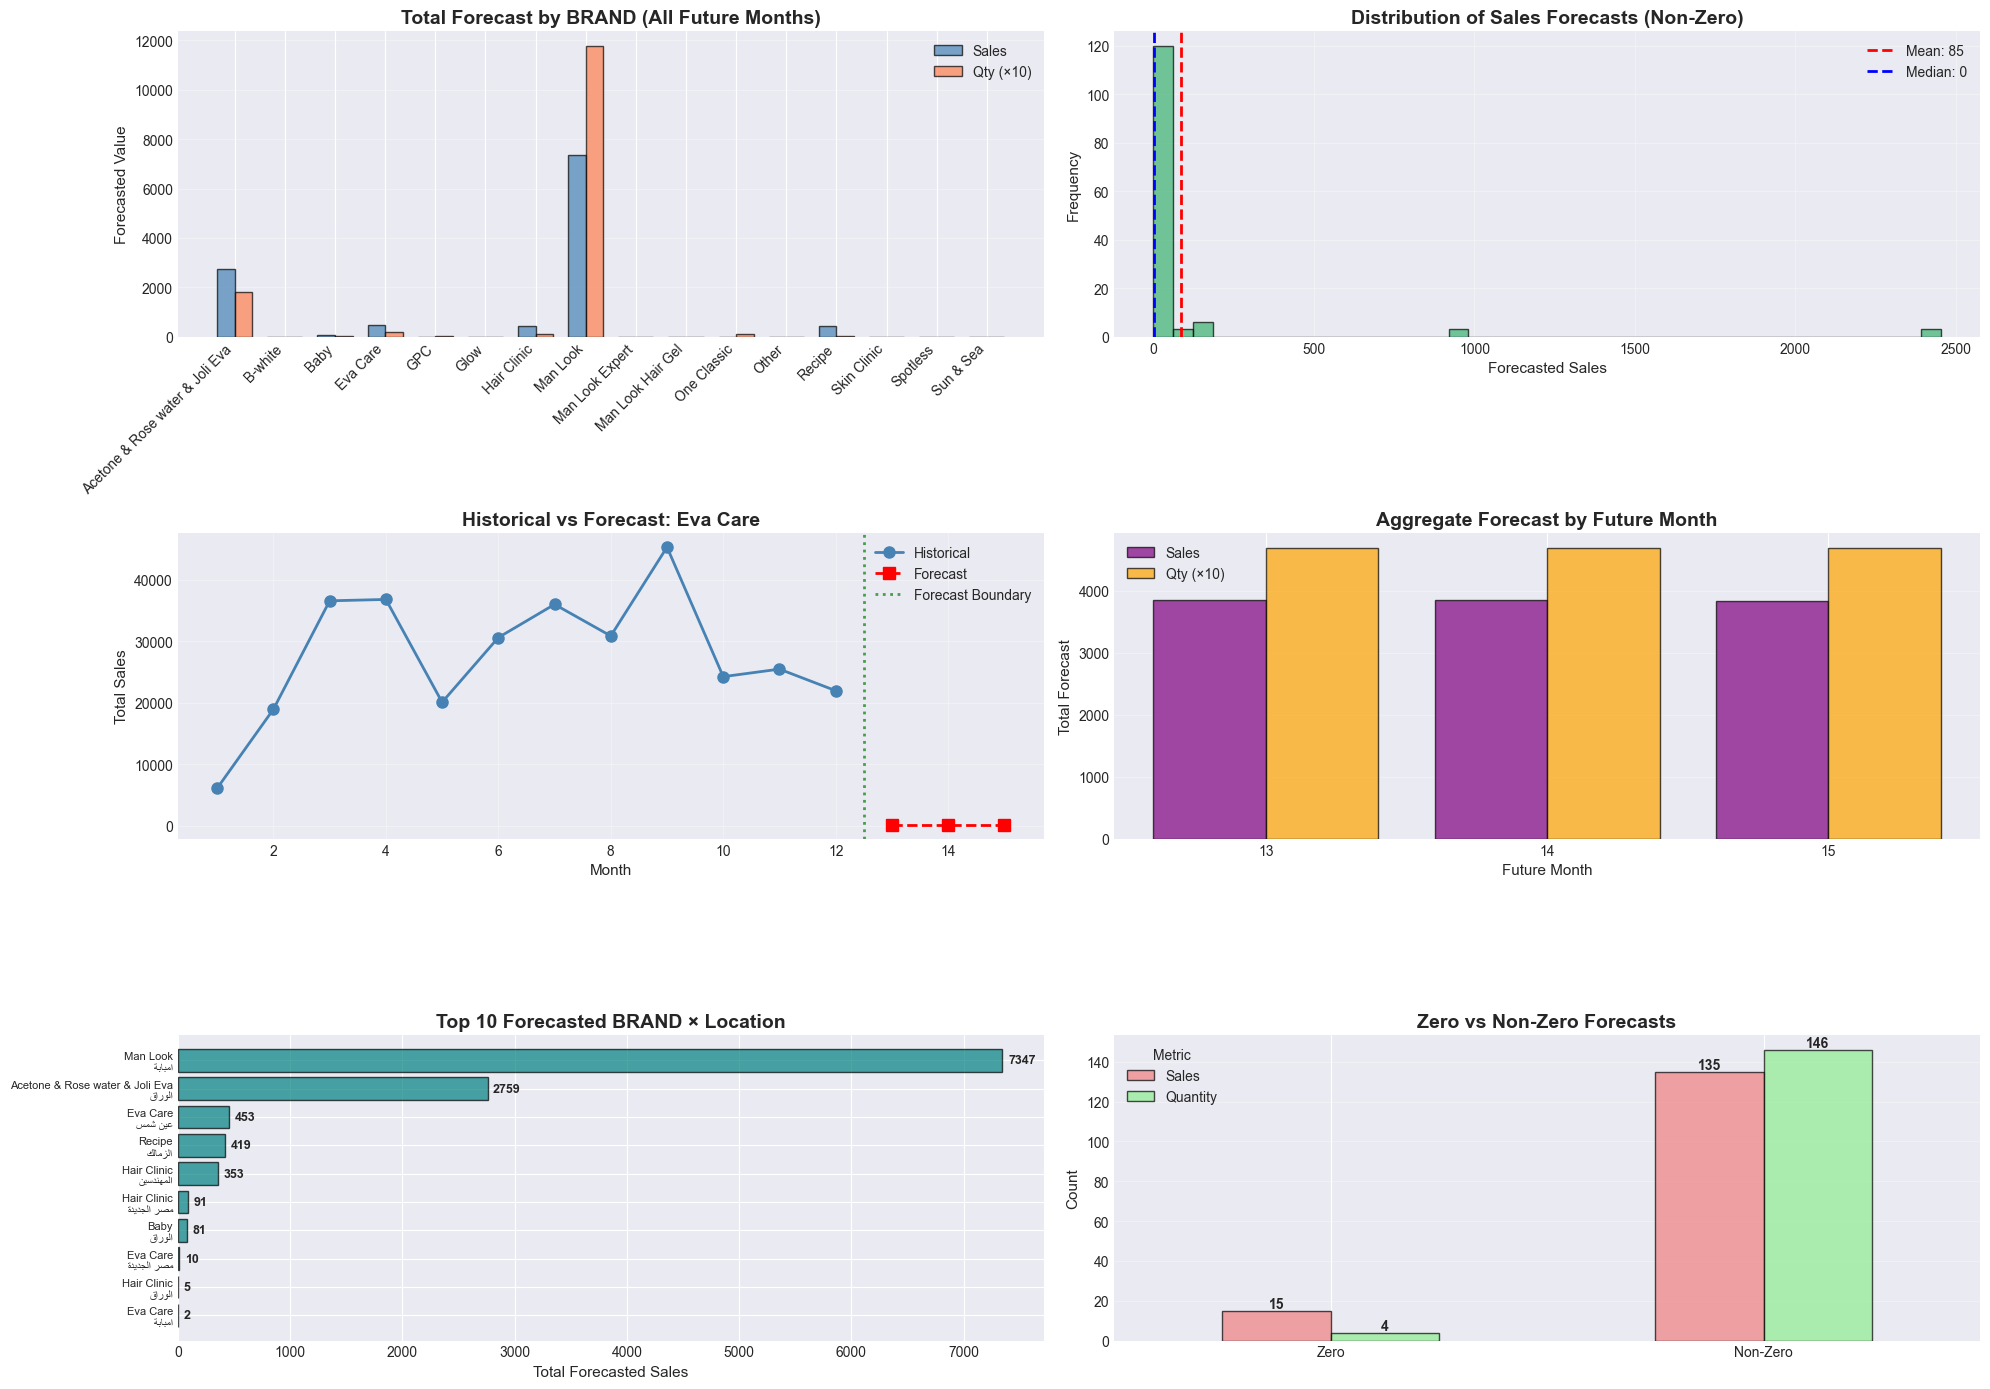


 Forecast visualizations complete
 Saved to: output\forecast_analysis.png


In [146]:
print("Visualizing forecast results \n")

fig = plt.figure(figsize=(20, 14))

# 1. Forecast by BRAND
ax1 = plt.subplot(3, 2, 1)
forecast_by_brand = df_forecast.groupby('BRAND')[['forecast_sales', 'forecast_qty']].sum()
x_pos = np.arange(len(forecast_by_brand))
width = 0.35
ax1.bar(x_pos - width/2, forecast_by_brand['forecast_sales'], width, label='Sales',
        color='steelblue', edgecolor='black', alpha=0.7)
ax1.bar(x_pos + width/2, forecast_by_brand['forecast_qty']*10, width, label='Qty (×10)',
        color='coral', edgecolor='black', alpha=0.7)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(forecast_by_brand.index, rotation=45, ha='right')
ax1.set_ylabel('Forecasted Value', fontsize=11)
ax1.set_title('Total Forecast by BRAND (All Future Months)', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# 2. Forecast Distribution
ax2 = plt.subplot(3, 2, 2)
forecast_nonzero = df_forecast[df_forecast['forecast_sales'] > 0]['forecast_sales']
ax2.hist(forecast_nonzero, bins=40, color='mediumseagreen', edgecolor='black', alpha=0.7)
ax2.axvline(forecast_nonzero.mean(), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {forecast_nonzero.mean():.0f}')
ax2.axvline(forecast_nonzero.median(), color='blue', linestyle='--', linewidth=2,
            label=f'Median: {forecast_nonzero.median():.0f}')
ax2.set_xlabel('Forecasted Sales', fontsize=11)
ax2.set_ylabel('Frequency', fontsize=11)
ax2.set_title('Distribution of Sales Forecasts (Non-Zero)', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Historical vs Forecast Comparison (Top Brand)
ax3 = plt.subplot(3, 2, 3)
top_brand = df_long.groupby('BRAND')['sales'].sum().idxmax()
hist_brand = df_long[df_long['BRAND'] == top_brand].groupby('month_id')['sales'].sum()
forecast_brand = df_forecast[df_forecast['BRAND'] == top_brand].groupby('target_month')['forecast_sales'].sum()

ax3.plot(hist_brand.index, hist_brand.values, marker='o', linewidth=2, markersize=8,
         label='Historical', color='steelblue')
ax3.plot(forecast_brand.index, forecast_brand.values, marker='s', linewidth=2, markersize=8,
         label='Forecast', color='red', linestyle='--')
ax3.axvline(max_month + 0.5, color='green', linestyle=':', linewidth=2, alpha=0.7,
            label='Forecast Boundary')
ax3.set_xlabel('Month', fontsize=11)
ax3.set_ylabel('Total Sales', fontsize=11)
ax3.set_title(f'Historical vs Forecast: {top_brand}', fontsize=14, fontweight='bold')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Forecast by Month
ax4 = plt.subplot(3, 2, 4)
forecast_by_month = df_forecast.groupby('target_month')[['forecast_sales', 'forecast_qty']].sum()
ax4.bar(forecast_by_month.index - 0.2, forecast_by_month['forecast_sales'], 0.4,
        label='Sales', color='purple', edgecolor='black', alpha=0.7)
ax4.bar(forecast_by_month.index + 0.2, forecast_by_month['forecast_qty']*10, 0.4,
        label='Qty (×10)', color='orange', edgecolor='black', alpha=0.7)
ax4.set_xlabel('Future Month', fontsize=11)
ax4.set_ylabel('Total Forecast', fontsize=11)
ax4.set_title('Aggregate Forecast by Future Month', fontsize=14, fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')
ax4.set_xticks(forecast_by_month.index)

# 5. Top 10 Forecasted BRAND×Location
ax5 = plt.subplot(3, 2, 5)
top_forecasts = df_forecast.groupby(['BRAND', 'عنوان العميل'])['forecast_sales'].sum().sort_values(ascending=False).head(10)


top_labels = []
for b, l in top_forecasts.index:

    l_display = get_display(arabic_reshaper.reshape(l))
    if len(l) > 12:
        label = f"{b}\n{l_display[:12]}..."
    else:
        label = f"{b}\n{l_display}"
    top_labels.append(label)

ax5.barh(range(len(top_forecasts)), top_forecasts.values, color='teal', edgecolor='black', alpha=0.7)
ax5.set_yticks(range(len(top_forecasts)))
ax5.set_yticklabels(top_labels, fontsize=8)
ax5.set_xlabel('Total Forecasted Sales', fontsize=11)
ax5.set_title('Top 10 Forecasted BRAND × Location', fontsize=14, fontweight='bold')
ax5.invert_yaxis()
for i, v in enumerate(top_forecasts.values):
    ax5.text(v + 50, i, f'{v:.0f}', va='center', fontsize=9, fontweight='bold')

# 6. Zero Forecast Analysis
ax6 = plt.subplot(3, 2, 6)
zero_analysis = pd.DataFrame({
    'Sales': [
        (df_forecast['forecast_sales'] == 0).sum(),
        (df_forecast['forecast_sales'] > 0).sum()
    ],
    'Quantity': [
        (df_forecast['forecast_qty'] == 0).sum(),
        (df_forecast['forecast_qty'] > 0).sum()
    ]
}, index=['Zero', 'Non-Zero'])

zero_analysis.plot(kind='bar', ax=ax6, color=['lightcoral', 'lightgreen'],
                   edgecolor='black', alpha=0.7)
ax6.set_ylabel('Count', fontsize=11)
ax6.set_title('Zero vs Non-Zero Forecasts', fontsize=14, fontweight='bold')
ax6.set_xticklabels(zero_analysis.index, rotation=0)
ax6.legend(title='Metric')
ax6.grid(True, alpha=0.3, axis='y')

# Add value labels
for container in ax6.containers:
    ax6.bar_label(container, fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig(OUTPUT_DIR / 'forecast_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n Forecast visualizations complete")
print(f" Saved to: {OUTPUT_DIR / 'forecast_analysis.png'}")

---
## Cell 17: Output Formatting & Validation

In [147]:
print("Formatting output for submission...\n")

df_forecast['forecast_sales_lower'] = df_forecast['forecast_sales'] * 0.95
df_forecast['forecast_sales_upper'] = df_forecast['forecast_sales'] * 1.05
df_forecast['forecast_qty_lower'] = df_forecast['forecast_qty'] * 0.95
df_forecast['forecast_qty_upper'] = df_forecast['forecast_qty'] * 1.05

# Then round
for col in ['forecast_sales_lower', 'forecast_sales_upper', 'forecast_qty_lower', 'forecast_qty_upper']:
    df_forecast[col] = df_forecast[col].round(2)

output_cols_core = ['BRAND', 'عنوان العميل', 'target_month', 'forecast_sales', 'forecast_qty']
output_cols_full = output_cols_core + [
    'forecast_sales_lower', 'forecast_sales_upper',
    'forecast_qty_lower', 'forecast_qty_upper'
]

df_output_core = df_forecast[output_cols_core].copy()

df_output_full = df_forecast[output_cols_full].copy()

print("OUTPUT SCHEMA ")

print(f"\n1. CORE OUTPUT (Required for submission):")
print(f"   Columns: {list(df_output_core.columns)}")
print(f"   Shape: {df_output_core.shape}")

print(f"\n2. FULL OUTPUT (With prediction intervals):")
print(f"   Columns: {list(df_output_full.columns)}")
print(f"   Shape: {df_output_full.shape}")

# Check for duplicates
duplicate_check = df_output_core.groupby(['BRAND', 'عنوان العميل', 'target_month']).size()
duplicates = duplicate_check[duplicate_check > 1]

print(f"\n3. UNIQUENESS CONSTRAINT:")
if len(duplicates) > 0:
    print(f"    WARNING: Found {len(duplicates)} duplicate key combinations!")
    print(duplicates)
else:
    print(f"    No duplicates (BRAND + عنوان العميل + target_month is unique)")

missing_core = df_output_core.isnull().sum()
missing_full = df_output_full.isnull().sum()

print(f"\n4. MISSING VALUES:")
if missing_core.sum() > 0:
    print(f"    WARNING: Missing values in core output:")
    print(missing_core[missing_core > 0])
else:
    print(f"    No missing values in core output")

if missing_full.sum() > 0:
    print(f"    WARNING: Missing values in full output:")
    print(missing_full[missing_full > 0])
else:
    print(f"   No missing values in full output (including intervals)")

print(f"\n5. DATA TYPES (Core Output):")
print(df_output_core.dtypes)

print(f"\n6. FORECAST SUMMARY STATISTICS:")
print(f"\nPoint Forecasts:")
print(df_output_core[['forecast_sales', 'forecast_qty']].describe())

print(f"\nPrediction Intervals (80% confidence):")
interval_summary = df_output_full[['forecast_sales_lower', 'forecast_sales_upper',
                                    'forecast_qty_lower', 'forecast_qty_upper']].describe()
print(interval_summary)

# Calculate average interval width
avg_interval_sales = (df_output_full['forecast_sales_upper'] - df_output_full['forecast_sales_lower']).mean()
avg_interval_qty = (df_output_full['forecast_qty_upper'] - df_output_full['forecast_qty_lower']).mean()

print(f"\n7. PREDICTION INTERVAL WIDTH (Average):")
print(f"   Sales: ±{avg_interval_sales/2:.2f} (range: {avg_interval_sales:.2f})")
print(f"   Qty:   ±{avg_interval_qty/2:.2f} (range: {avg_interval_qty:.2f})")


Formatting output for submission...

OUTPUT SCHEMA 

1. CORE OUTPUT (Required for submission):
   Columns: ['BRAND', 'عنوان العميل', 'target_month', 'forecast_sales', 'forecast_qty']
   Shape: (150, 5)

2. FULL OUTPUT (With prediction intervals):
   Columns: ['BRAND', 'عنوان العميل', 'target_month', 'forecast_sales', 'forecast_qty', 'forecast_sales_lower', 'forecast_sales_upper', 'forecast_qty_lower', 'forecast_qty_upper']
   Shape: (150, 9)

3. UNIQUENESS CONSTRAINT:
    No duplicates (BRAND + عنوان العميل + target_month is unique)

4. MISSING VALUES:
    No missing values in core output
   No missing values in full output (including intervals)

5. DATA TYPES (Core Output):
BRAND              object
عنوان العميل       object
target_month        int64
forecast_sales    float64
forecast_qty      float64
dtype: object

6. FORECAST SUMMARY STATISTICS:

Point Forecasts:
       forecast_sales  forecast_qty
count      150.000000    150.000000
mean        76.914870      9.383800
std        36

---
## Cell 18: Export to CSV

In [137]:
print("Exporting predictions to CSV\n")

output_file_full = OUTPUT_DIR / 'predictions.csv'
df_output_full.to_csv(output_file_full, index=False, encoding='utf-8-sig')

print("FULL OUTPUT")
print(f"File: {output_file_full}")
print(f"Size: {output_file_full.stat().st_size / 1024:.2f} KB")
print(f"Rows: {len(df_output_full)}")
print(f"Columns: {list(df_output_full.columns)}\n")

verify_core = pd.read_csv(output_file_core)
verify_full = pd.read_csv(output_file_full)

print("FILE VERIFICATION")
print(f"Core file shape: {verify_core.shape}")
print(f"Full file shape: {verify_full.shape}\n")

print("output with prediction intervals:")
print(
    verify_full[ ['BRAND','target_month','forecast_sales','forecast_sales_lower','forecast_sales_upper'] ].head(10))




print(output_file_core)
print(f"Schema: {list(verify_core.columns)}")
print(f"Records: {len(verify_core)}")

print("\n Intervals)")
print(output_file_full)

print(f"Records: {len(verify_full)}")


Exporting predictions to CSV

FULL OUTPUT
File: output\predictions.csv
Size: 13.19 KB
Rows: 150
Columns: ['BRAND', 'عنوان العميل', 'target_month', 'forecast_sales', 'forecast_qty', 'forecast_sales_lower', 'forecast_sales_upper', 'forecast_qty_lower', 'forecast_qty_upper']

FILE VERIFICATION
Core file shape: (150, 9)
Full file shape: (150, 9)

output with prediction intervals:
                             BRAND  target_month  forecast_sales  forecast_sales_lower  forecast_sales_upper
0                      Skin Clinic            13        0.160263                  0.15                  0.17
1                         Eva Care            13        3.470270                  3.30                  3.64
2                             Glow            13        0.160263                  0.15                  0.17
3                      Hair Clinic            13      117.814682                111.92                123.71
4                           Recipe            13        0.160263            

---
## Cell 19: Generate Diagnostics

In [138]:
print("Generating diagnostics report...\n")

# Calculate bias indicators by BRAND
diagnostics = []

for brand in df_output['BRAND'].unique():
    brand_forecasts = df_output[df_output['BRAND'] == brand]

    diagnostics.append({
        'BRAND': brand,
        'num_locations': int(brand_forecasts['عنوان العميل'].nunique()),
        'num_forecasts': int(len(brand_forecasts)),
        'avg_forecast_sales': float(brand_forecasts['forecast_sales'].mean()),
        'avg_forecast_qty': float(brand_forecasts['forecast_qty'].mean()),
        'total_forecast_sales': float(brand_forecasts['forecast_sales'].sum()),
        'total_forecast_qty': float(brand_forecasts['forecast_qty'].sum())
    })

df_diagnostics = pd.DataFrame(diagnostics)

print("Diagnostics by BRAND:")
print(df_diagnostics)

# Save diagnostics
diagnostics_file = OUTPUT_DIR / 'diagnostics.csv'
df_diagnostics.to_csv(diagnostics_file, index=False, encoding='utf-8-sig')

print(f"\n Diagnostics saved to: {diagnostics_file}")

# Model metadata
metadata = {
    'timestamp': datetime.now().isoformat(),
    'total_combinations': int(len(unique_combinations)),
    'forecast_months': [int(x) for x in forecast_months],
    'total_forecasts': int(len(df_output)),
    'validation_mae_sales': float(mae_sales),
    'validation_rmse_sales': float(rmse_sales),
    'validation_mae_qty': float(mae_qty),
    'validation_rmse_qty': float(rmse_qty),
    'model_type': 'XGBoost',
    'features_used': feature_cols if isinstance(feature_cols, list) else list(feature_cols)
}

metadata_file = OUTPUT_DIR / 'metadata.json'
with open(metadata_file, 'w', encoding='utf-8') as f:
    json.dump(metadata, f, indent=2, ensure_ascii=False)

print(f" Metadata saved to: {metadata_file}")


Generating diagnostics report...

Diagnostics by BRAND:
                              BRAND  num_locations  num_forecasts  avg_forecast_sales  avg_forecast_qty  total_forecast_sales  total_forecast_qty
0                       Skin Clinic              4             12            0.260000          0.017500                  3.12                0.21
1                          Eva Care              6             18           25.876667          1.031111                465.78               18.56
2                              Glow              4             12            0.160000          0.010000                  1.92                0.12
3                       Hair Clinic              5             15           29.986000          0.734000                449.79               11.01
4                            Recipe              4             12           35.018333          0.110000                420.22                1.32
5   Acetone & Rose water & Joli Eva              5             15   

In [149]:
import shutil

shutil.make_archive("output", "zip", "output")


'C:\\Users\\ra922\\output.zip'